# NYC Taxi Trip Duration Dataset Analysis 🚖

## Taxi Trip Data Fields

- **id**: A unique identifier for each trip 🆔
- **vendor_id**: A code indicating the provider associated with the trip record 🏢
- **pickup_datetime**: Date and time when the meter was engaged ⏱️
- **dropoff_datetime**: Date and time when the meter was disengaged 🕒
- **passenger_count**: The number of passengers in the vehicle (driver entered value) 🚗
- **pickup_longitude**: The longitude where the meter was engaged 📍
- **pickup_latitude**: The latitude where the meter was engaged 🌍
- **dropoff_longitude**: The longitude where the meter was disengaged 📍
- **dropoff_latitude**: The latitude where the meter was disengaged 🌍
- **store_and_fwd_flag**: Indicates if the trip record was held in vehicle memory before sending to the vendor due to lack of server connection. Y = store and forward; N = not a store and forward trip 🗂️
- **trip_duration**: Duration of the trip in seconds ⏳


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 20

plt.rc("figure", figsize=(22, 8))


## Read data and discover it

This section involves reading the data and exploring its characteristics to gain insights.


In [2]:
taxi_data =pd.read_csv('./Data/train.csv')

In [3]:
taxi_data[['pickup_longitude','pickup_latitude','dropoff_longitude'	,'dropoff_latitude']].describe()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
count    1000000.000000   1000000.000000     1000000.000000    1000000.000000
mean         -73.973475        40.750947         -73.973421         40.751829
std            0.065404         0.033745           0.065432          0.035782
min         -121.933342        34.359695        -121.933304         34.359695
25%          -73.991852        40.737372         -73.991341         40.735928
50%          -73.981728        40.754131         -73.979767         40.754551
75%          -73.967346        40.768379         -73.963036         40.769833
max          -61.335529        51.881084         -61.335529         43.921028

In [4]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [5]:
taxi_data.describe(include = 'all')

id       vendor_id      pickup_datetime  passenger_count  \
count     1000000  1000000.000000              1000000   1000000.000000   
unique    1000000             NaN               962731              NaN   
top     id2793718             NaN  2016-04-05 18:55:21              NaN   
freq            1             NaN                    5              NaN   
mean          NaN        1.534793                  NaN         1.665353   
std           NaN        0.498788                  NaN         1.315723   
min           NaN        1.000000                  NaN         0.000000   
25%           NaN        1.000000                  NaN         1.000000   
50%           NaN        2.000000                  NaN         1.000000   
75%           NaN        2.000000                  NaN         2.000000   
max           NaN        2.000000                  NaN         7.000000   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
count     1000000.000000   1000000.000000     1000000.000000   
unique               NaN              NaN                NaN   
top                  NaN              NaN                NaN   
freq                 NaN              NaN                NaN   
mean          -73.973475        40.750947         -73.973421   
std             0.065404         0.033745           0.065432   
min          -121.933342        34.359695        -121.933304   
25%           -73.991852        40.737372         -73.991341   
50%           -73.981728        40.754131         -73.979767   
75%           -73.967346        40.768379         -73.963036   
max           -61.335529        51.881084         -61.335529   

        dropoff_latitude store_and_fwd_flag  trip_duration  
count     1000000.000000            1000000   1.000000e+06  
unique               NaN                  2            NaN  
top                  NaN                  N            NaN  
freq                 NaN             994443            NaN  
mean           40.751829                NaN   9.548850e+02  
std             0.035782                NaN   3.882070e+03  
min            34.359695                NaN   1.000000e+00  
25%            40.735928                NaN   3.970000e+02  
50%            40.754551                NaN   6.620000e+02  
75%            40.769833                NaN   1.074000e+03  
max            43.921028                NaN   2.227612e+06

- id column has all unique values for train
- vendor_id has only 2 unique values (1 or 2) with a median of 2
- passenger_count has 7 unique values (0,1,2,3,4,5,6,7) with a median of 1
- store_and_fwd_flag has 2 unique values (Y or N)


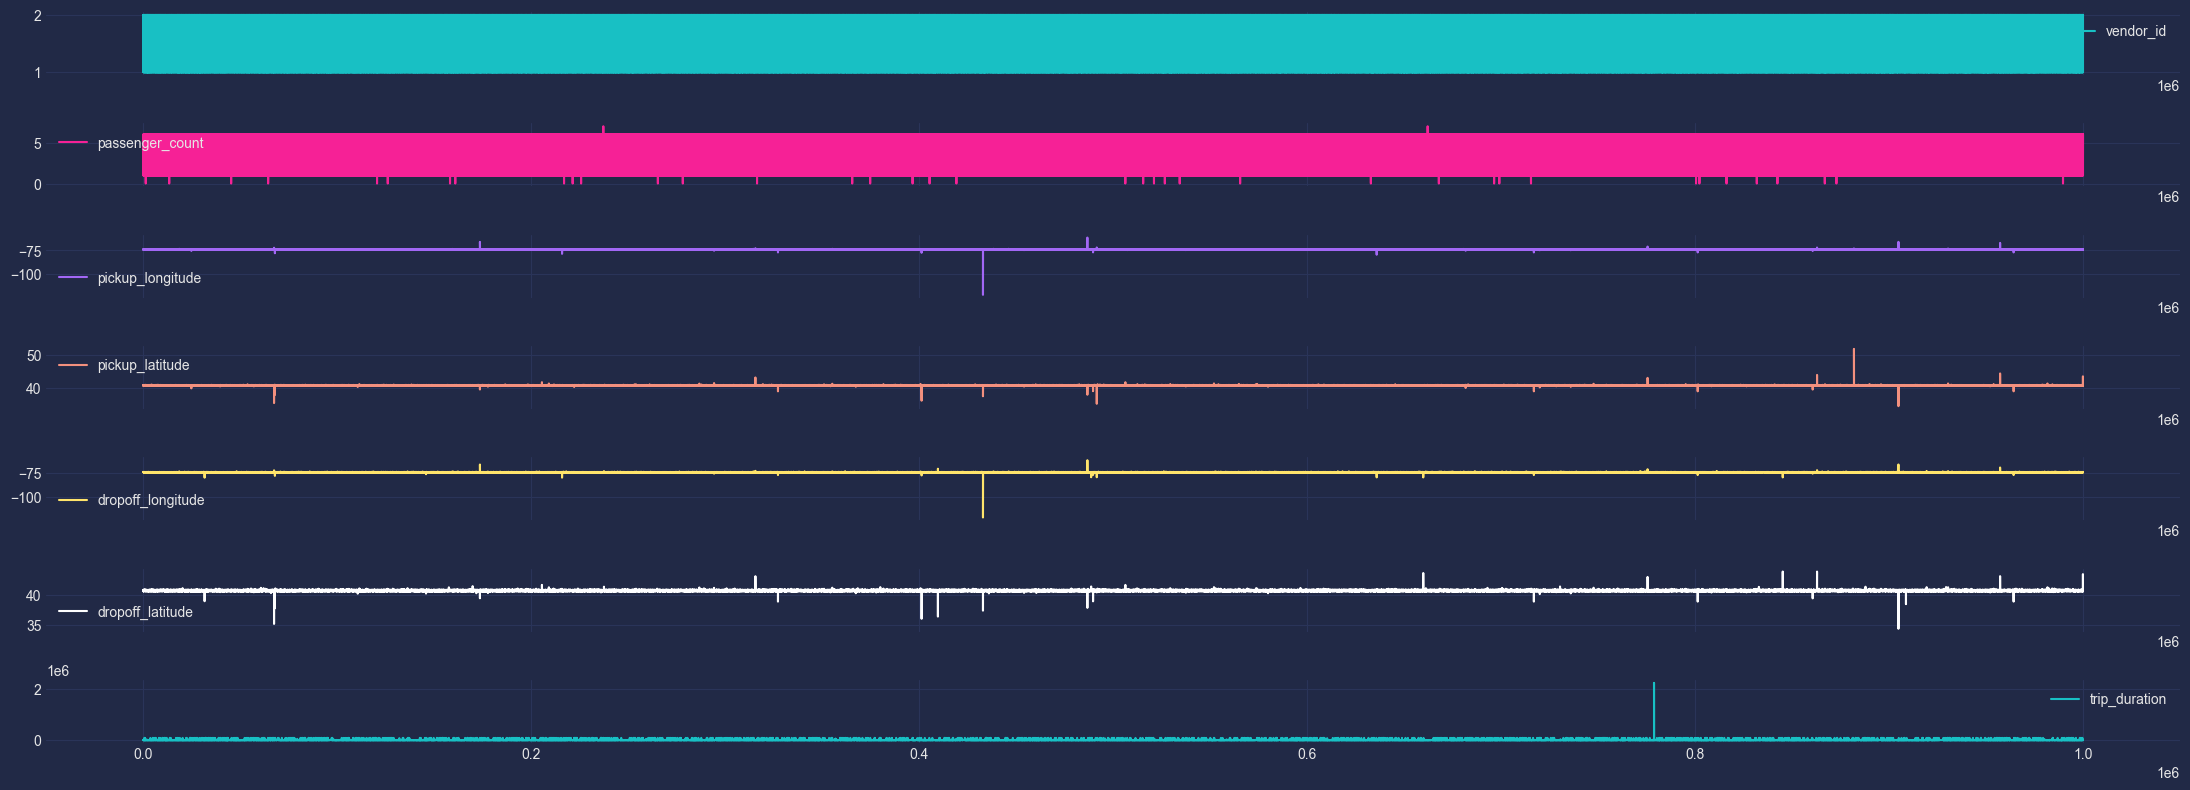

In [10]:
taxi_data.plot(subplots = True)
plt.tight_layout()
plt.show()

## Preprocessing


#### Feature Engineering


In [6]:
# Extracting additional info from date
def extract_datetime_features(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['trip_duration_minutes'] = df['trip_duration'] / 60

    df['year'] = df['pickup_datetime'].dt.year
    df['month'] = df['pickup_datetime'].dt.month
    df['season'] = df['pickup_datetime'].dt.month % 12 // 3 + 1
    # Extract day of the week (0 = Monday, 6 = Sunday)
    df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
    df['weekday'] = df['pickup_datetime'].dt.weekday
    df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['is_night_time']=[1 if (i==0 or i>=19)  else 0 for i in df['pickup_datetime'].dt.hour]
    df['late_night_time']=[1 if (i<5 or i>0)  else 0 for i in df['pickup_datetime'].dt.hour]
    df['pickup_date'] = pd.to_datetime(df['pickup_datetime'].dt.date)
    return df
taxi_data = extract_datetime_features(taxi_data)

In [7]:
print('Checking for missing data in train:')
print('Missing values found:\n',taxi_data.isna().sum())



Checking for missing data in train:
Missing values found:
 id                  0
vendor_id           0
pickup_datetime     0
passenger_count     0
pickup_longitude    0
                   ..
is_weekend          0
pickup_hour         0
is_night_time       0
late_night_time     0
pickup_date         0
Length: 21, dtype: int64


In [8]:
taxi_data.describe().T

count         mean          std          min  \
vendor_id              1000000.0     1.534793     0.498788     1.000000   
passenger_count        1000000.0     1.665353     1.315723     0.000000   
pickup_longitude       1000000.0   -73.973475     0.065404  -121.933342   
pickup_latitude        1000000.0    40.750947     0.033745    34.359695   
dropoff_longitude      1000000.0   -73.973421     0.065432  -121.933304   
dropoff_latitude       1000000.0    40.751829     0.035782    34.359695   
trip_duration          1000000.0   954.884971  3882.070116     1.000000   
trip_duration_minutes  1000000.0    15.914750    64.701169     0.016667   
year                   1000000.0  2016.000000     0.000000  2016.000000   
month                  1000000.0     3.515209     1.681171     1.000000   
season                 1000000.0     1.839042     0.675156     1.000000   
day_of_week            1000000.0     3.051486     1.954644     0.000000   
weekday                1000000.0     3.051486     1.954644     0.000000   
is_weekend             1000000.0     0.285775     0.451783     0.000000   
pickup_hour            1000000.0    13.604165     6.400685     0.000000   
is_night_time          1000000.0     0.316567     0.465137     0.000000   
late_night_time        1000000.0     1.000000     0.000000     1.000000   

                               25%          50%          75%           max  
vendor_id                 1.000000     2.000000     2.000000  2.000000e+00  
passenger_count           1.000000     1.000000     2.000000  7.000000e+00  
pickup_longitude        -73.991852   -73.981728   -73.967346 -6.133553e+01  
pickup_latitude          40.737372    40.754131    40.768379  5.188108e+01  
dropoff_longitude       -73.991341   -73.979767   -73.963036 -6.133553e+01  
dropoff_latitude         40.735928    40.754551    40.769833  4.392103e+01  
trip_duration           397.000000   662.000000  1074.000000  2.227612e+06  
trip_duration_minutes     6.616667    11.033333    17.900000  3.712687e+04  
year                   2016.000000  2016.000000  2016.000000  2.016000e+03  
month                     2.000000     4.000000     5.000000  6.000000e+00  
season                    1.000000     2.000000     2.000000  3.000000e+00  
day_of_week               1.000000     3.000000     5.000000  6.000000e+00  
weekday                   1.000000     3.000000     5.000000  6.000000e+00  
is_weekend                0.000000     0.000000     1.000000  1.000000e+00  
pickup_hour               9.000000    14.000000    19.000000  2.300000e+01  
is_night_time             0.000000     0.000000     1.000000  1.000000e+00  
late_night_time           1.000000     1.000000     1.000000  1.000000e+00

## Remove Outliers


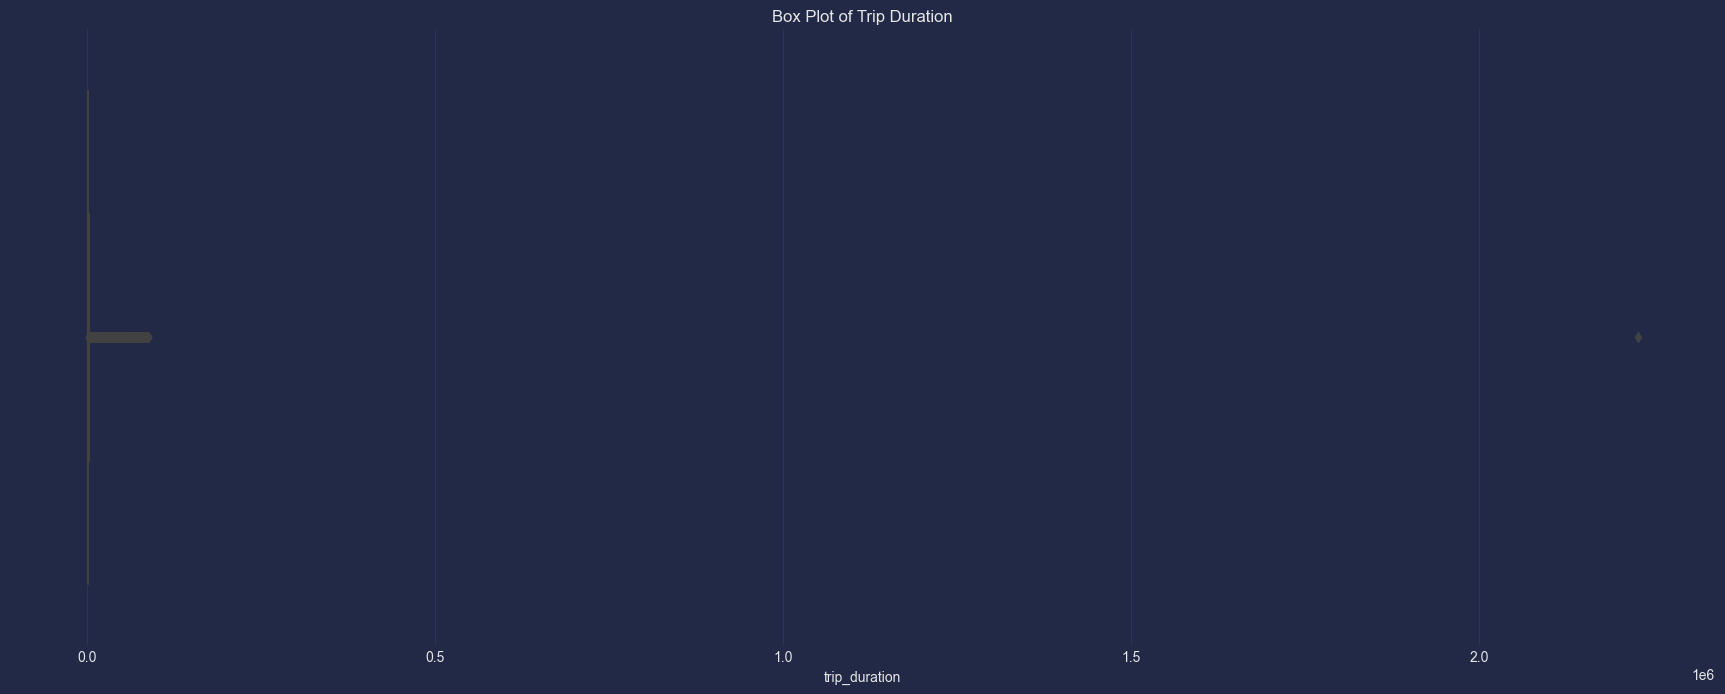

In [9]:
sns.boxplot(x=taxi_data['trip_duration'])
plt.title('Box Plot of Trip Duration')
plt.show()

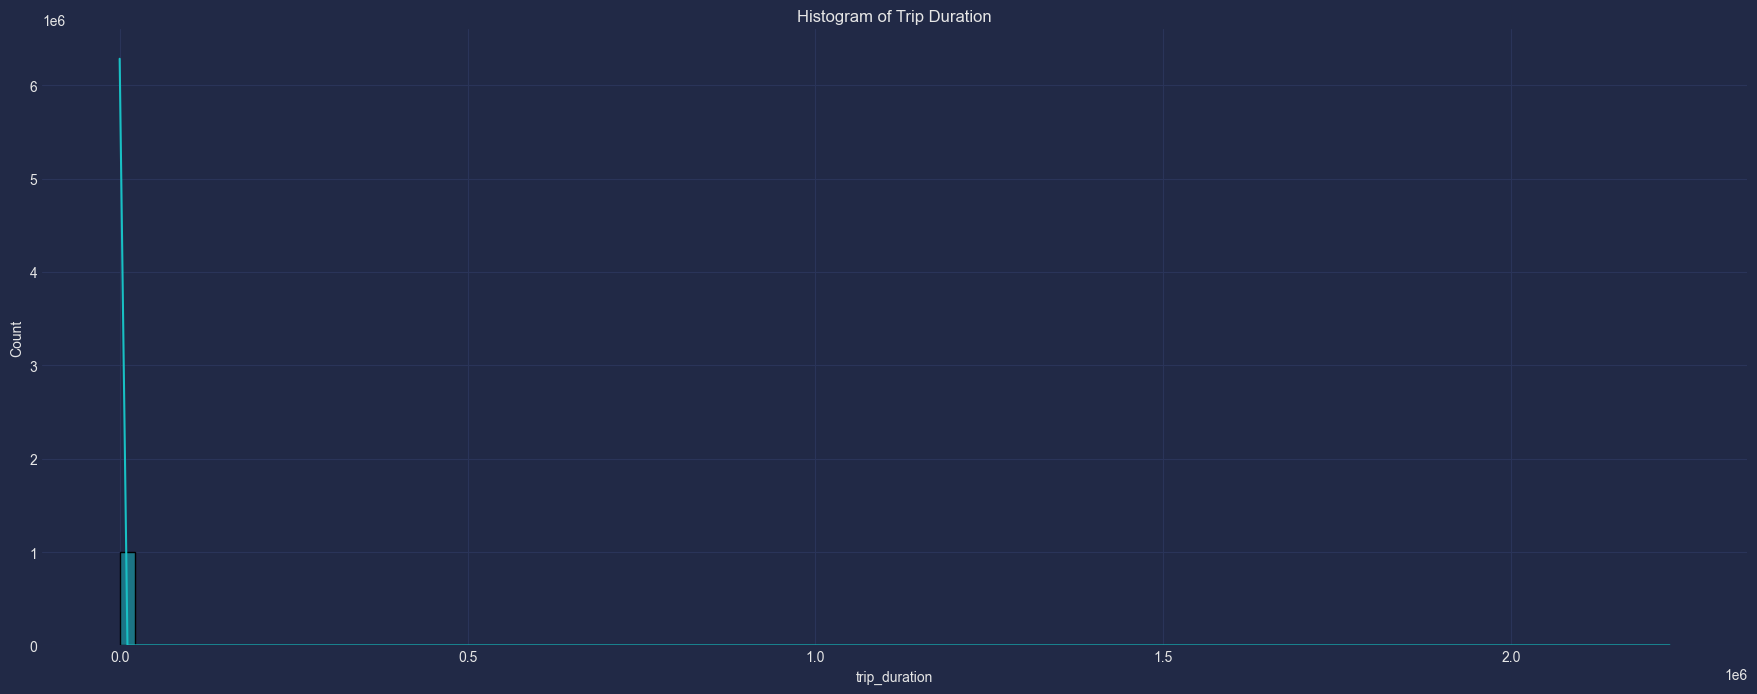

In [10]:
sns.histplot(taxi_data['trip_duration'], bins=100, kde=True)
plt.title('Histogram of Trip Duration')
plt.show()

In [11]:

def remove_outliers(df, column):
    """Remove outliers from a specified column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [12]:
# Remove outliers from the taxi_data dataset
taxi_data_filtered = remove_outliers(taxi_data,'trip_duration')

# Display the shape of the datasets to see the difference
print(f"Original taxi_data shape: {taxi_data.shape}")
print(f"Filtered taxi_data shape: {taxi_data_filtered.shape}")

# Continue with the filtered dataset
taxi_data = taxi_data_filtered


Lower Bound: 0
Upper Bound: 2089.5
Original taxi_data shape: (1000000, 21)
Filtered taxi_data shape: (949061, 21)


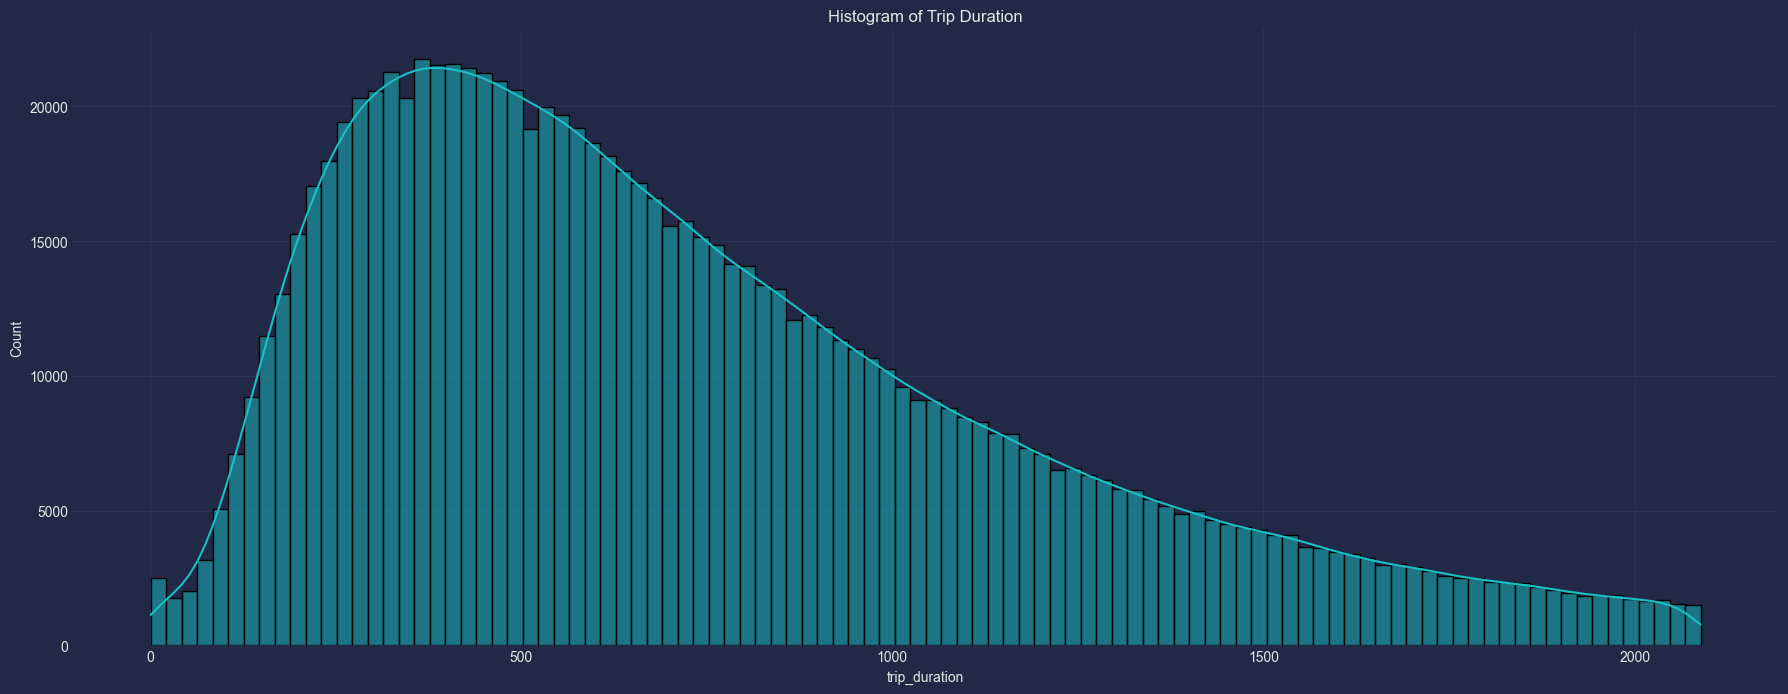

In [13]:
sns.histplot(taxi_data['trip_duration'], bins=100, kde=True)
plt.title('Histogram of Trip Duration')
plt.show()

In [14]:
taxi_data['trip_duration'].describe()

count    949061.000000
mean        731.022722
std         447.441440
min           1.000000
25%         384.000000
50%         631.000000
75%         990.000000
max        2089.000000
Name: trip_duration, dtype: float64

### Filter by Geographic Limits

- By searching on Google, we find that the coordinates for New York are:

- Longitude borders: (-74.03, -73.75)
- Latitude borders: (40.63, 40.85)


In [15]:
# Mean Pickup and Dropoff Latitude
print('Mean Pickup Latitude: ', taxi_data['pickup_latitude'].mean())
print('Mean Dropoff Latitude: ',taxi_data['dropoff_latitude'].mean())

Mean Pickup Latitude:  40.7522660057775
Mean Dropoff Latitude:  40.752908572518116


In [16]:
# Mean Pickup and Dropoff Longitude
print('Mean Pickup Longitude: ', taxi_data['pickup_longitude'].mean())
print('Mean Dropoff Longitude: ',taxi_data['dropoff_longitude'].mean())

Mean Pickup Longitude:  -73.97670598539007
Mean Dropoff Longitude:  -73.97494873459446


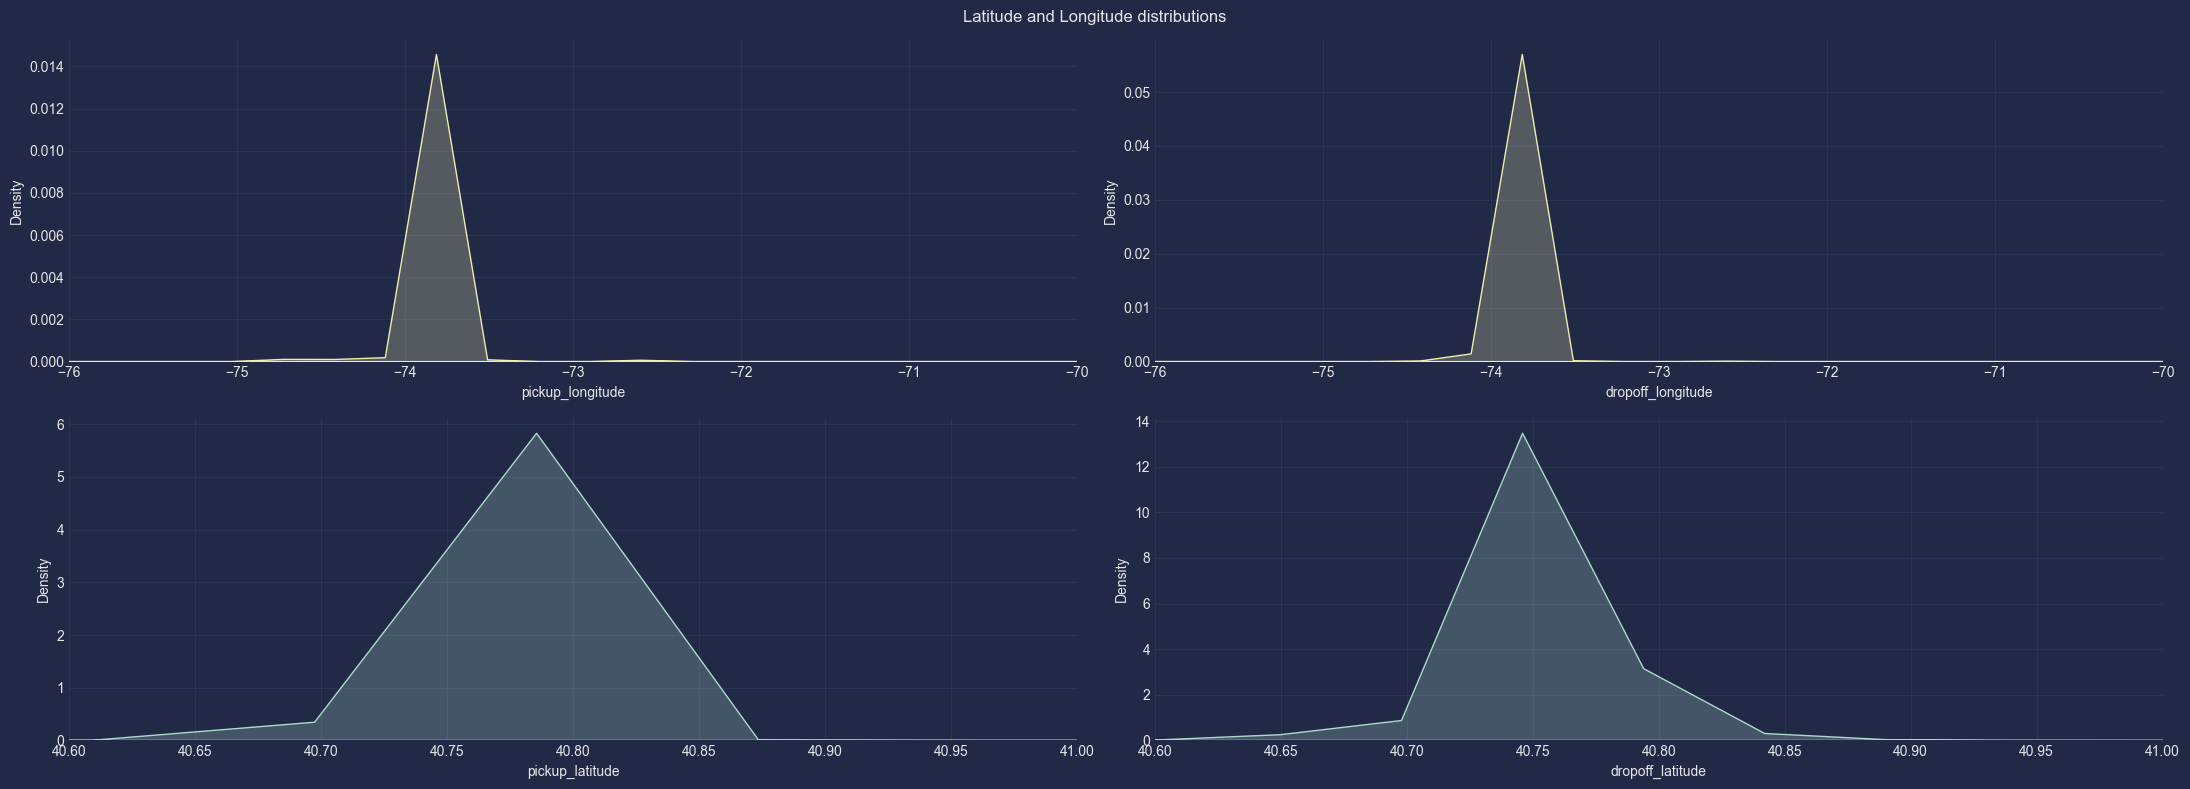

In [17]:
fig,ax = plt.subplots(2,2)

kde1 = sns.kdeplot(data=taxi_data,x='pickup_longitude',fill=True,color='#eea',ax=ax[0,0])
kde2 = sns.kdeplot(data=taxi_data,x='dropoff_longitude',fill=True,color='#eea',ax=ax[0,1])
ax[0,0].set_xlim([-76,-70])
ax[0,1].set_xlim([-76,-70])

kde3 = sns.kdeplot(data=taxi_data,x='pickup_latitude',fill=True,color='#acdaca',ax=ax[1,0])
kde4 = sns.kdeplot(data=taxi_data,x='dropoff_latitude',fill=True,color='#acdaca',ax=ax[1,1])
ax[1,0].set_xlim([40.6,41])
ax[1,1].set_xlim([40.6,41])

fig.suptitle('Latitude and Longitude distributions')
fig.tight_layout()
fig.show()

In [18]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
taxi_data = taxi_data[
    (taxi_data.pickup_longitude > xlim[0]) & (taxi_data.pickup_longitude < xlim[1]) & 
    (taxi_data.dropoff_longitude > xlim[0]) & (taxi_data.dropoff_longitude < xlim[1]) &
    (taxi_data.pickup_latitude > ylim[0]) & (taxi_data.pickup_latitude < ylim[1]) & 
    (taxi_data.dropoff_latitude > ylim[0]) & (taxi_data.dropoff_latitude < ylim[1])
]

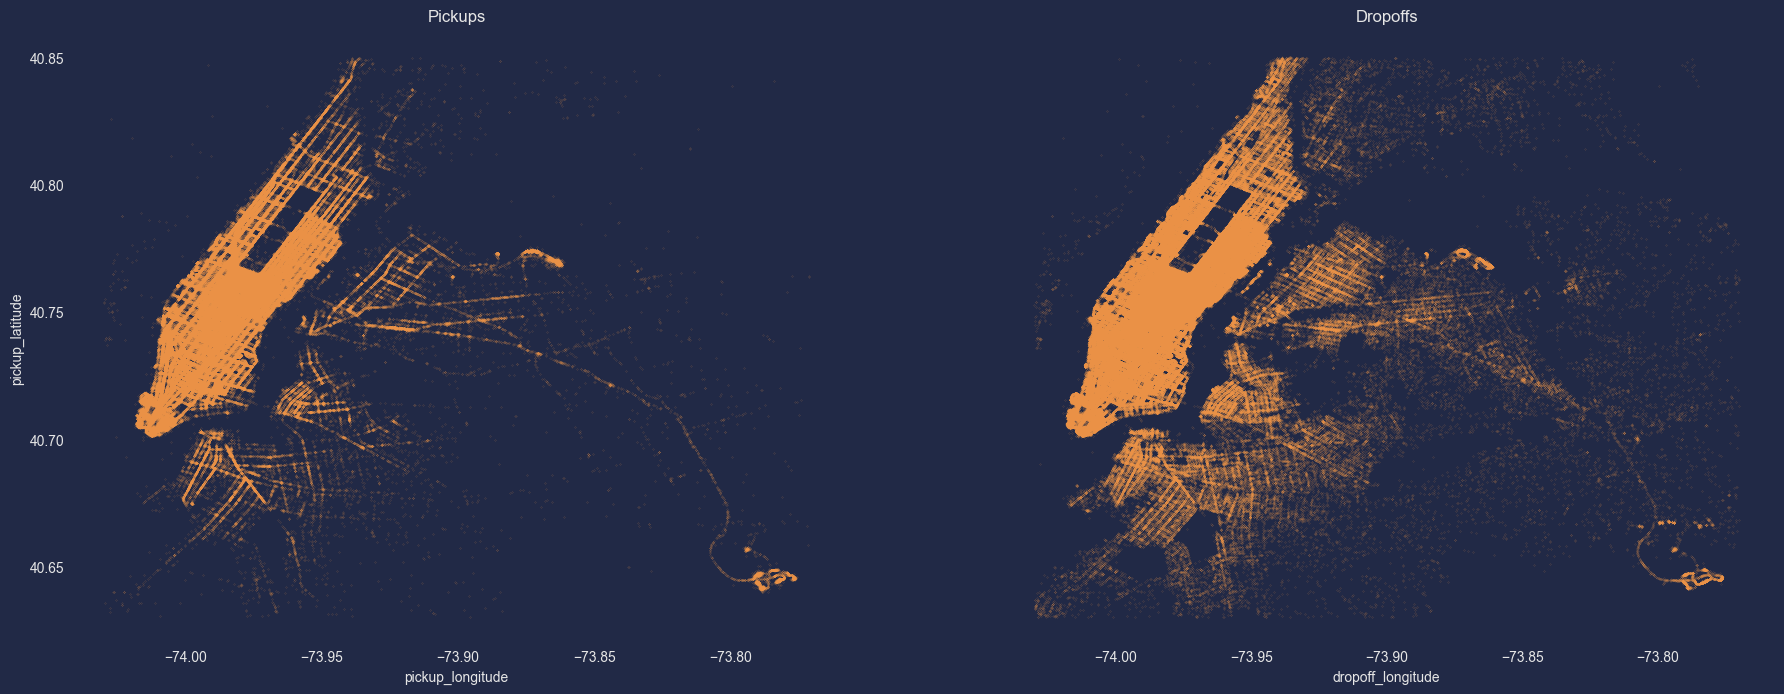

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
taxi_data.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='#F2994B', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Pickups")
# ax1.set_facecolor('black')
ax1.grid(False)

taxi_data.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='#F2994B',
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
# ax2.set_facecolor('black')
ax2.grid(False)

#### We have latitudes and longitudes which we cannot use directly in modeling. So I am going to experiment those into clusters.


In [20]:
from sklearn.cluster import KMeans


def apply_clustering(df, n_clusters=6):
    pickup_coordinates = df[['pickup_latitude', 'pickup_longitude']]
    dropoff_coordinates = df[['dropoff_latitude', 'dropoff_longitude']]

    pickup_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['pickup_cluster_label'] = pickup_kmeans.fit_predict(pickup_coordinates)

    dropoff_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['dropoff_cluster_label'] = dropoff_kmeans.fit_predict(dropoff_coordinates)
    
    return df

taxi_data=apply_clustering(taxi_data)

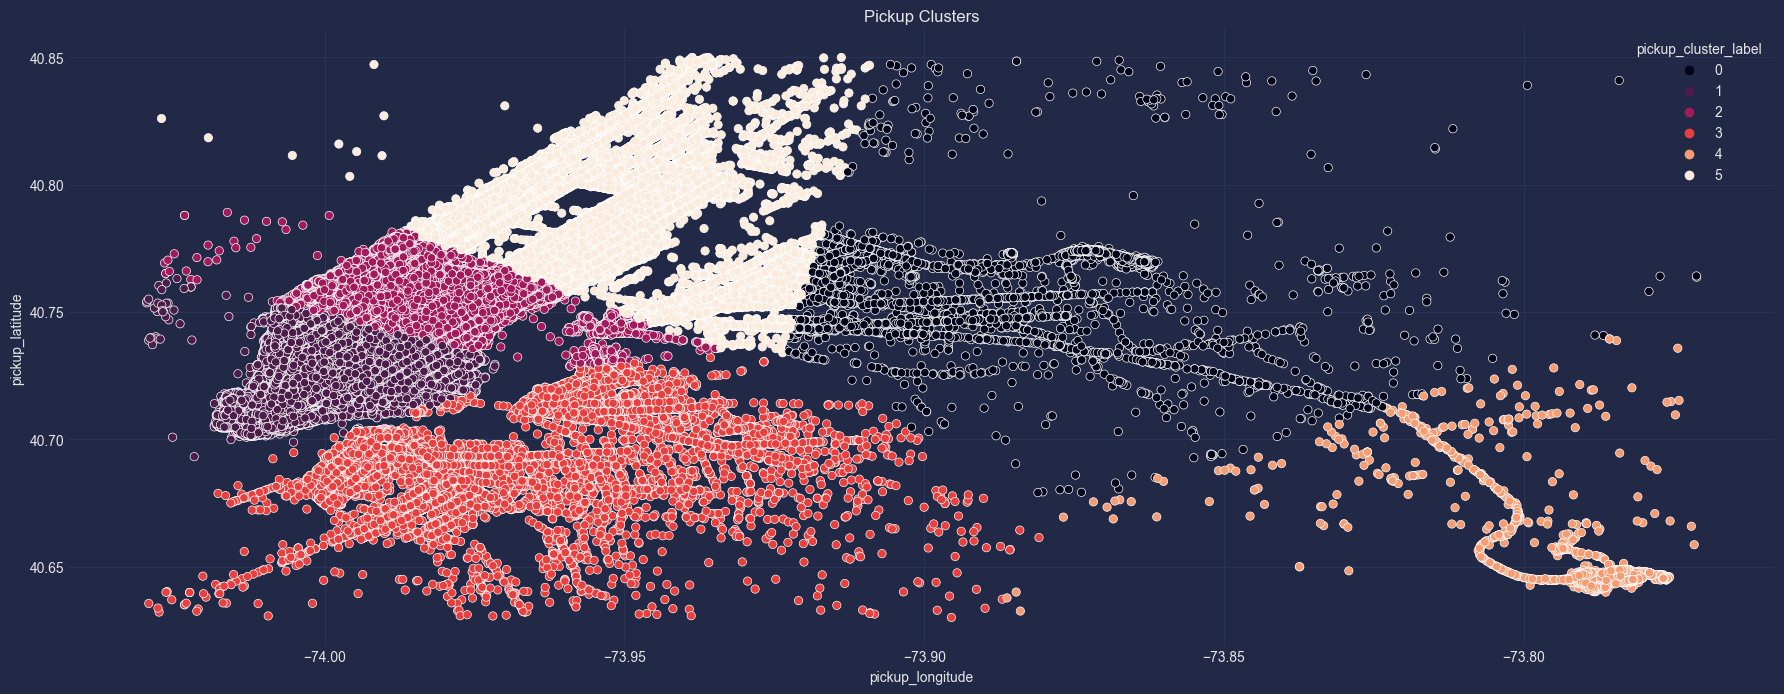

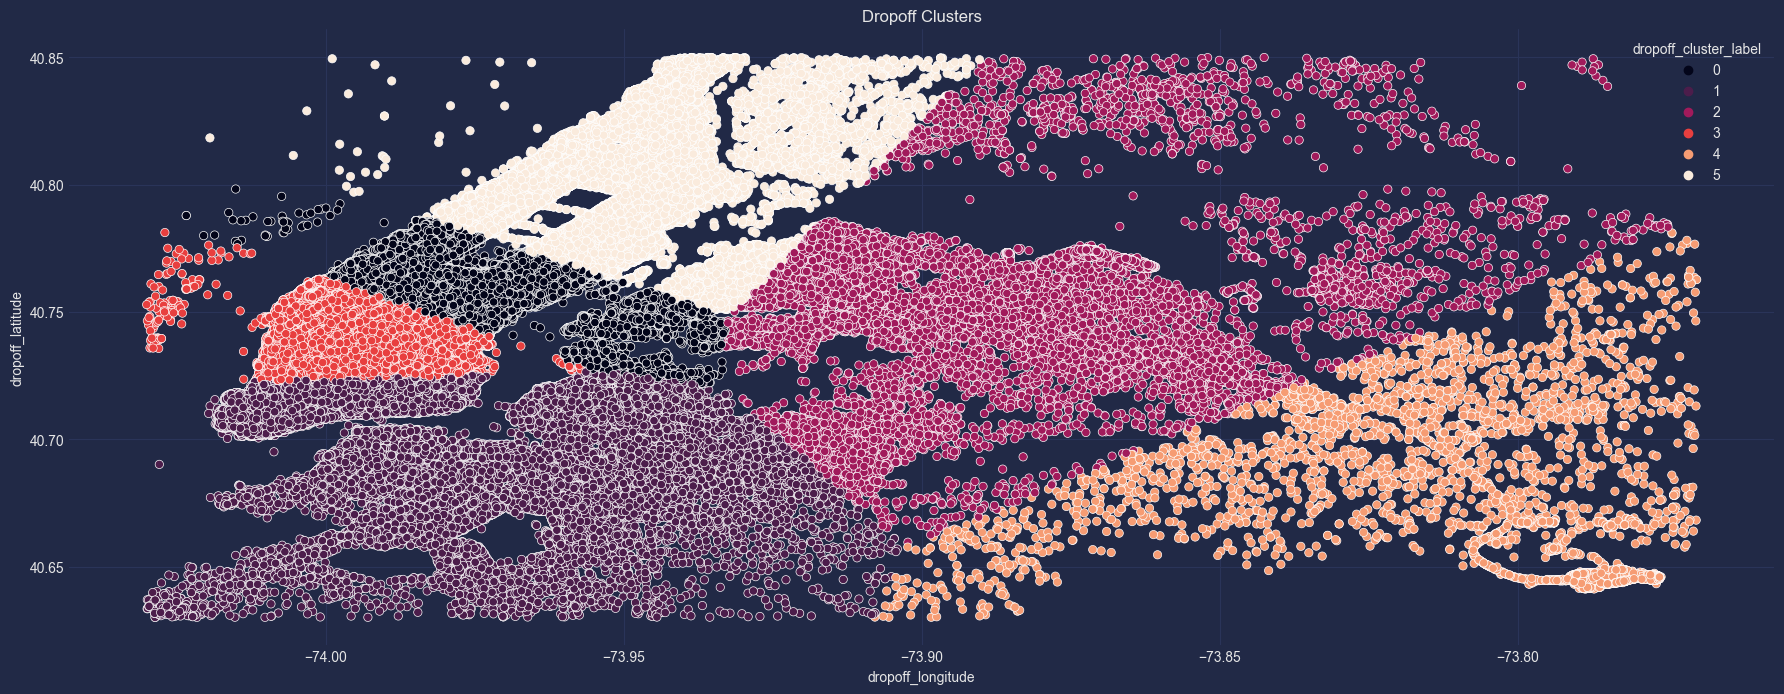

In [21]:
def visualize_clusters(df):
    sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='pickup_cluster_label', data=df, palette='rocket')
    plt.title('Pickup Clusters')
    plt.show()

    sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='dropoff_cluster_label', data=df, palette='rocket')
    plt.title('Dropoff Clusters')
    plt.show()

visualize_clusters(taxi_data)

In [22]:
taxi_data.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id2793718          2 2016-06-08 07:36:19                1   
1  id3485529          2 2016-04-03 12:58:11                1   
2  id1816614          2 2016-06-05 02:49:13                5   
3  id1050851          2 2016-05-05 17:18:27                2   
5  id2734699          2 2016-04-14 12:17:42                3   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.985611        40.735943         -73.980331         40.760468   
1        -73.978394        40.764351         -73.991623         40.749859   
2        -73.989059        40.744389         -73.973381         40.748692   
3        -73.990326        40.731136         -73.991264         40.748917   
5        -73.969833        40.768570         -73.962646         40.767181   

  store_and_fwd_flag  trip_duration  trip_duration_minutes  year  month  \
0                  N           1040              17.333333  2016      6   
1                  N            827              13.783333  2016      4   
2                  N            614              10.233333  2016      6   
3                  N            867              14.450000  2016      5   
5                  N            374               6.233333  2016      4   

   season  day_of_week  weekday  is_weekend  pickup_hour  is_night_time  \
0       3            2        2           0            7              0   
1       2            6        6           1           12              0   
2       3            6        6           1            2              0   
3       2            3        3           0           17              0   
5       2            3        3           0           12              0   

   late_night_time pickup_date  pickup_cluster_label  dropoff_cluster_label  
0                1  2016-06-08                     1                      0  
1                1  2016-04-03                     2                      3  
2                1  2016-06-05                     2                      0  
3                1  2016-05-05                     1                      3  
5                1  2016-04-14                     5                      0

In [23]:
taxi_data.shape

(939442, 23)

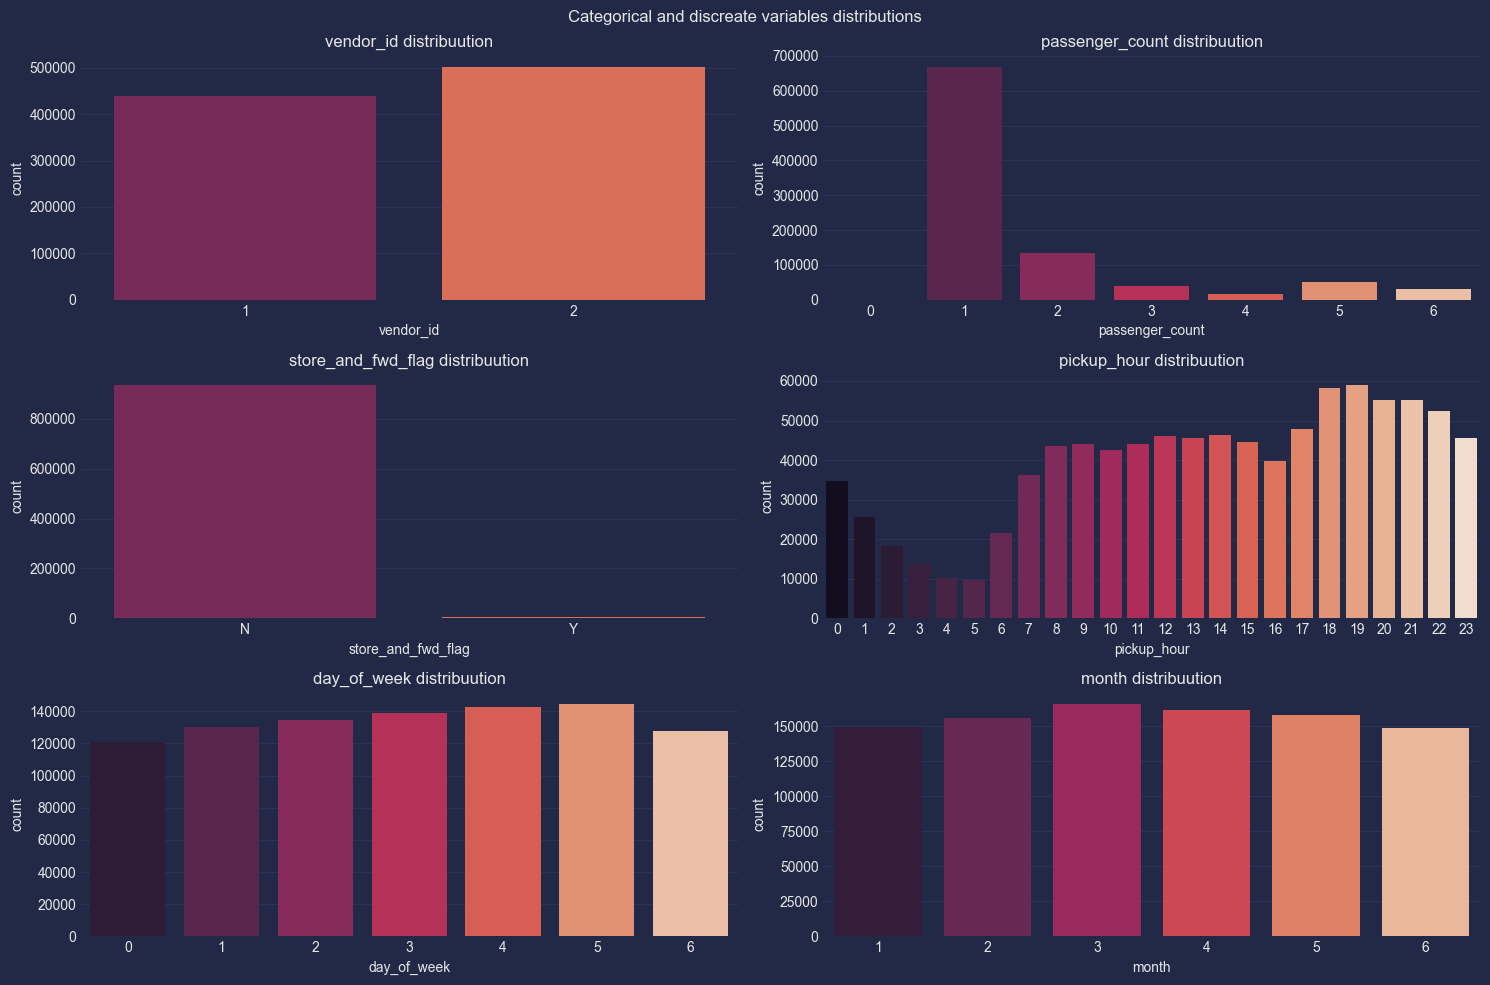

In [24]:
fig = plt.figure(figsize=(15,10))
for idx,col in enumerate(['vendor_id','passenger_count','store_and_fwd_flag','pickup_hour','day_of_week','month']):
    fig.add_subplot(3,2,idx+1)
    countplot = sns.countplot(data=taxi_data,x=col,palette='rocket')
    countplot.set(title=f'{col} distribuution')
    
fig.suptitle('Categorical and discreate variables distributions')
fig.tight_layout()
fig.show()

- Vendor 2 made more trips than vendor 1
- Most trips were made with 1 passenger
- There were mostly N=not a store and forward trip
- After 12pm there was a dip in the number of rides till 5am . After that there was gradual increase till 6pm evening then again a gradual increase.


## Trip Duration Analysis 📊🕒


## Overall Analysis ⏲️

This section examines the general characteristics of trip durations, including average trip times and how they are distributed across all trips.


### What is the average trip duration?


In [25]:
# Calculate and print the average trip duration in minutes
average_trip_duration_minutes = taxi_data['trip_duration_minutes'].mean()
print(f'Average Trip Duration: {average_trip_duration_minutes:.2f} minutes')


Average Trip Duration: 12.09 minutes


### What is the distribution of trip durations?


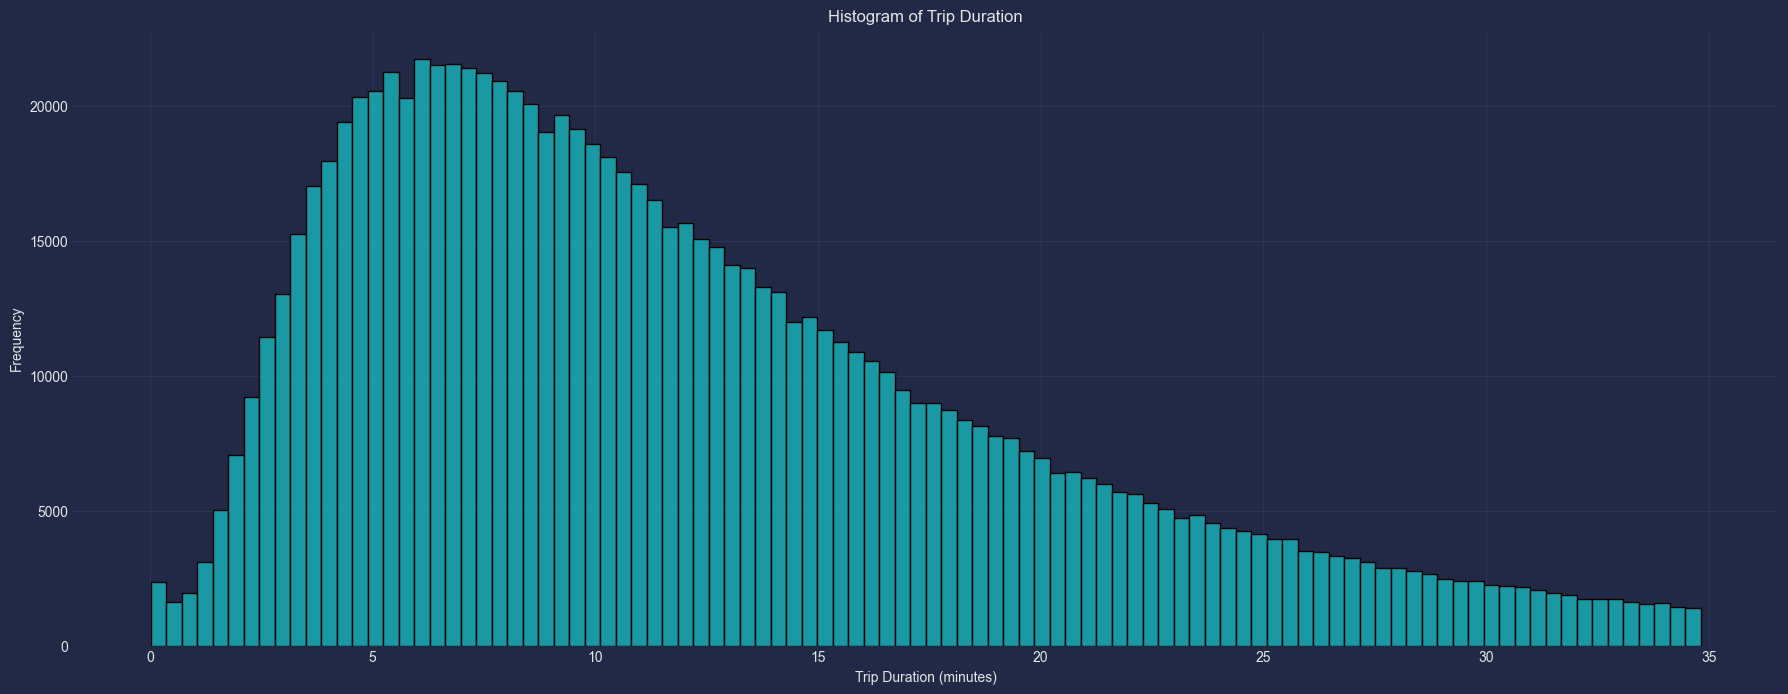

In [26]:
sns.histplot(taxi_data['trip_duration_minutes'], bins=100)
plt.title('Histogram of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

## Hourly Analysis ⏳

This section explores how trip volumes and durations change throughout the day, identifying any specific times when trips are more frequent or longer.


### How does trip volume vary by hour of the day?


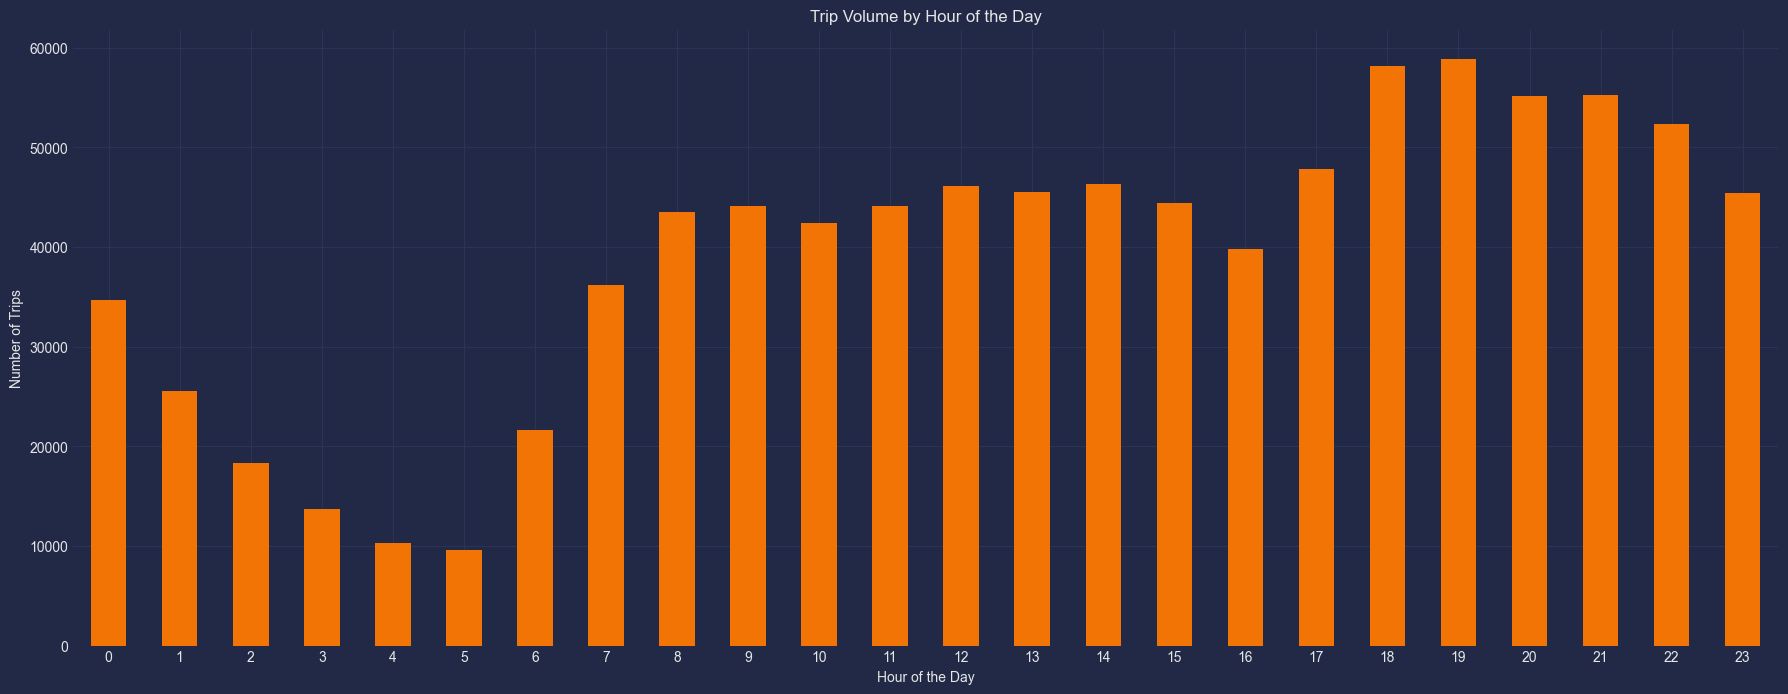

In [27]:
# Group by the pickup hour and count the number of trips
trip_volume_by_hour = taxi_data.groupby('pickup_hour').size()

# Plot the trip volume by hour of the day
trip_volume_by_hour.plot(kind='bar' , color ='#F27405')
plt.title('Trip Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


**Observations**:

1. **Morning Rush**: There's another noticeable peak in trip volume during the morning rush hours, particularly between 7 AM and 9 AM.

2. **Late Night and Early Morning Lulls**: The early morning hours from 12 AM to 6 AM generally have lower trip volumes, with the lowest volume occurring around 4 AM.

3. **Evening Activity**: Trip volumes remain relatively high during the late evening hours, suggesting continued activity and demand for transportation services even after traditional business hours.

4. **Consistency Across the Day**: Apart from the peak hours mentioned, trip volumes remain relatively consistent throughout the day, with minor fluctuations.


---


### What is the average trip duration by hour of the day?


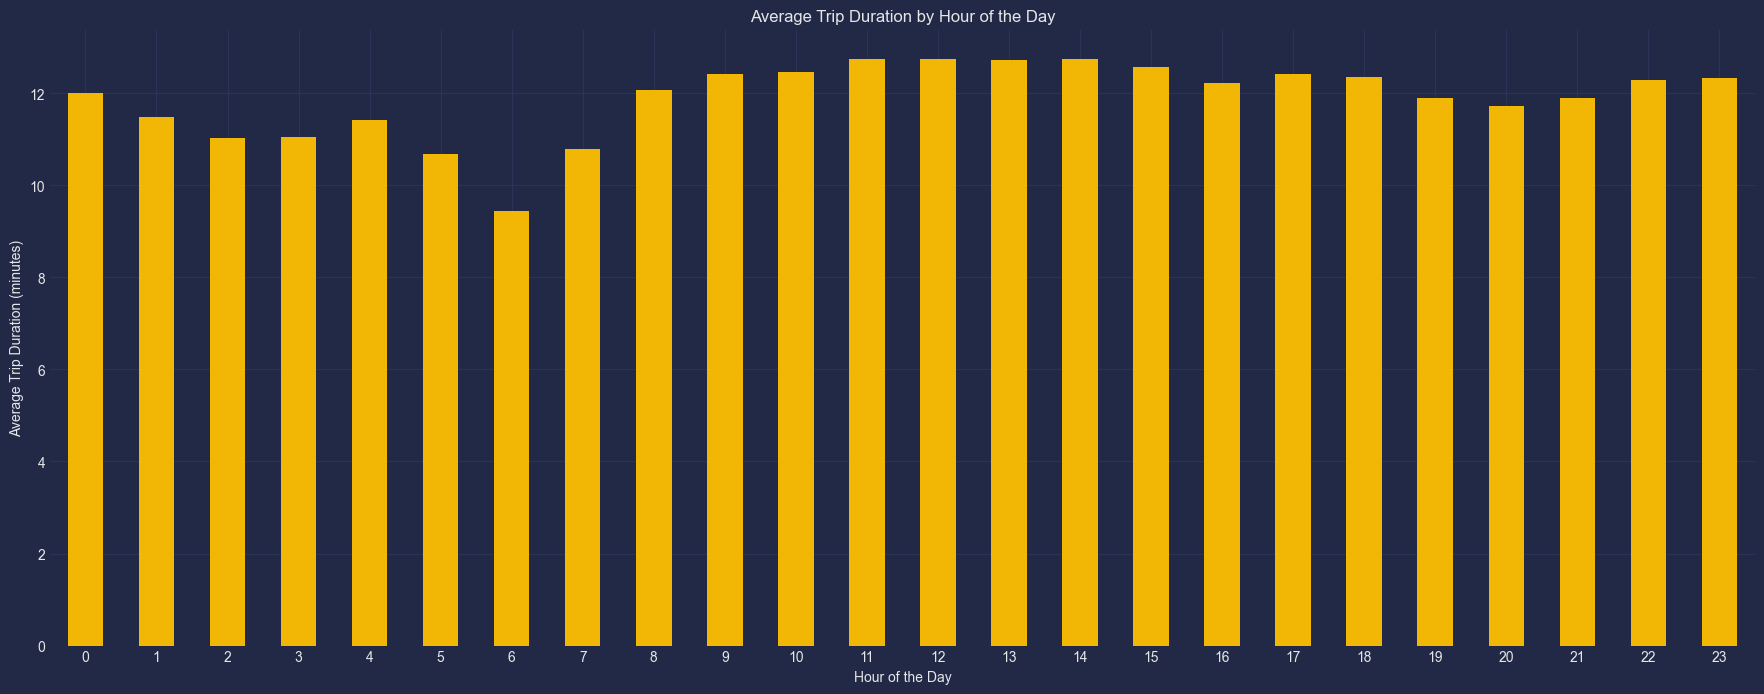

In [28]:
average_duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration_minutes'].mean()
average_duration_by_hour.plot(kind='bar', color='#F2B705')
plt.title('Average Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

**Intuition:**

- Trip durations are relatively lower in the early morning hours (00:00-05:00), with a noticeable dip at 05:00 (13.39 minutes), indicating that trips during these hours are generally shorter.
- Average trip durations increase starting from 08:00, peaking significantly during the mid-afternoon to early evening (12:00-16:00), with the highest average duration at 15:00 (18.05 minutes). This peak likely corresponds to increased traffic congestion and longer commute times during these hours.
- After 17:00, trip durations gradually decrease, with another smaller peak around 22:00 (15.57 minutes), potentially due to evening activities and the end of various night shifts.
- The shortest average trip durations occur at 05:00 (13.39 minutes) and early morning hours (06:00-07:00), which could be attributed to less traffic and fewer stops.

Overall, the average trip duration tends to be higher during the middle of the day and early evening, reflecting the impact of traffic patterns and commuting behavior.


---


### Are there peak hours where trip durations are longer or shorter?


In [29]:
peak_hours_volume = trip_volume_by_hour.nlargest(3)
print(f'Peak hours based on trip volume: {peak_hours_volume.index.tolist()}')

peak_hours_duration = average_duration_by_hour.nlargest(3)
print(f'Peak hours based on average trip duration: {peak_hours_duration.index.tolist()}')


Peak hours based on trip volume: [19, 18, 21]
Peak hours based on average trip duration: [12, 14, 11]


**Intuition:**

- **Peak hours based on trip volume**: The hours with the highest trip volumes, indicating peak demand for taxi rides, are 18:00, 19:00, and 21:00. During these hours, there is likely increased activity, such as people commuting home from work or heading out for evening plans, leading to a higher number of taxi rides.
- **Peak hours based on average trip duration**: The hours with the longest average trip durations are 15:00, 14:00, and 16:00. This suggests that during these hours, despite not necessarily having the highest volume of trips, the trips tend to take longer, potentially due to factors such as heavier traffic or longer distances traveled.

---


### Identify peak hours for taxi rides and how trip durations fluctuate throughout the day.


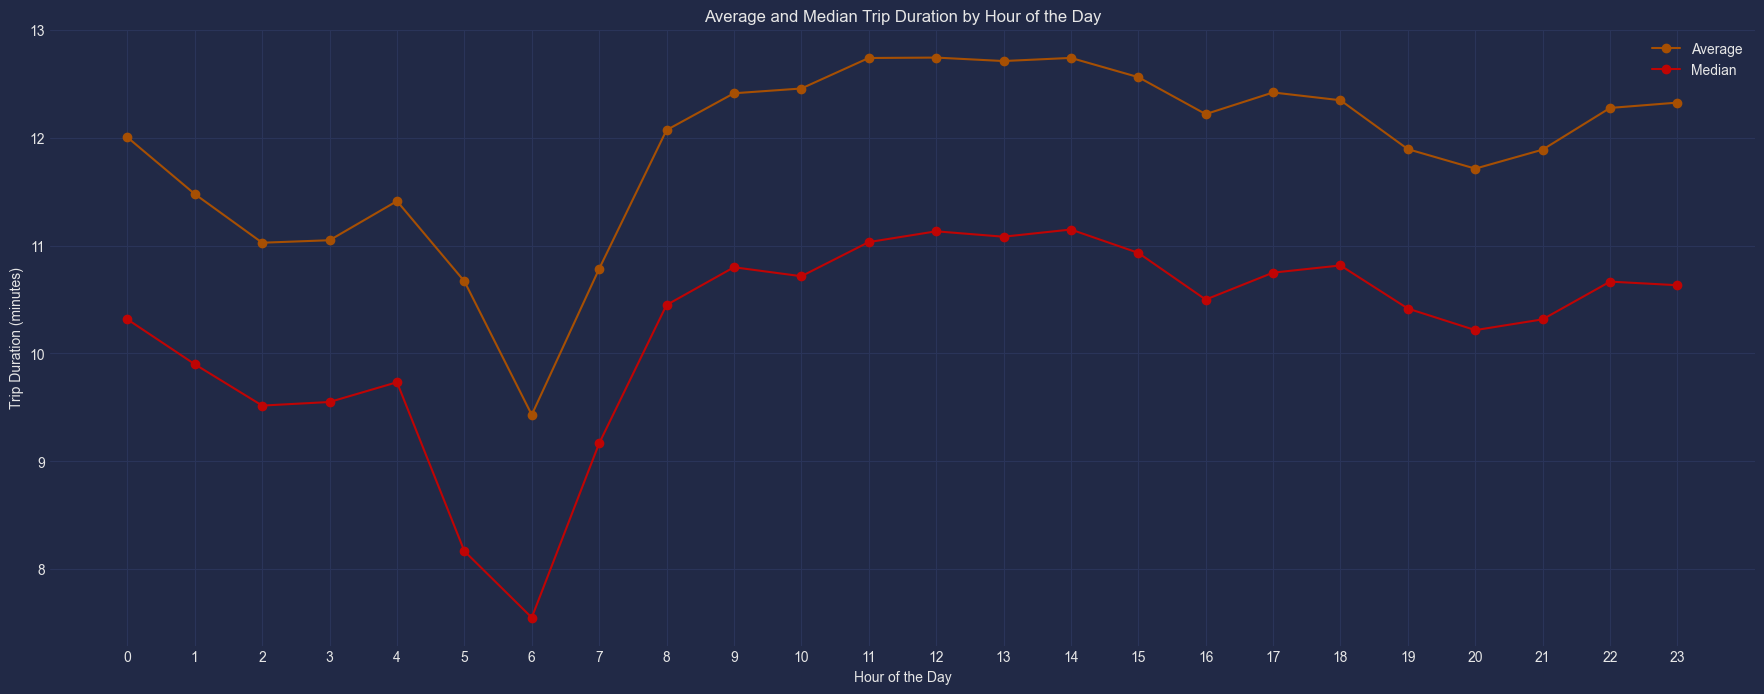

In [30]:

hourly_stats = taxi_data.groupby('pickup_hour')['trip_duration_minutes'].agg(['count', 'mean', 'median'])


# Plotting line plots for average and median trip duration by hour
plt.plot(hourly_stats.index, hourly_stats['mean'], marker='o', color='#A64F03', label='Average')
plt.plot(hourly_stats.index, hourly_stats['median'], marker='o', color='#BF0404', label='Median')
plt.title('Average and Median Trip Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Duration (minutes)')
plt.xticks(np.arange(24))
plt.legend()
plt.grid(True)
plt.show()


---


## Day of the Week Analysis 📅

This section investigates variations in trip durations and volumes between weekdays and weekends, providing insights into weekly travel patterns.


### Is there a difference in trip duration between weekdays and weekends?


In [31]:
# Weekdays (0-4) vs. Weekends (5-6)
taxi_data['weekend'] = taxi_data['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Average trip duration comparison between weekdays and weekends
avg_duration_comparison = taxi_data.groupby('weekend')['trip_duration_minutes'].mean()


print("Average Trip Duration Comparison:")
print(avg_duration_comparison)


Average Trip Duration Comparison:
weekend
Weekday    12.325885
Weekend    11.524598
Name: trip_duration_minutes, dtype: float64


### What is the distribution of trip start times by day of the week?


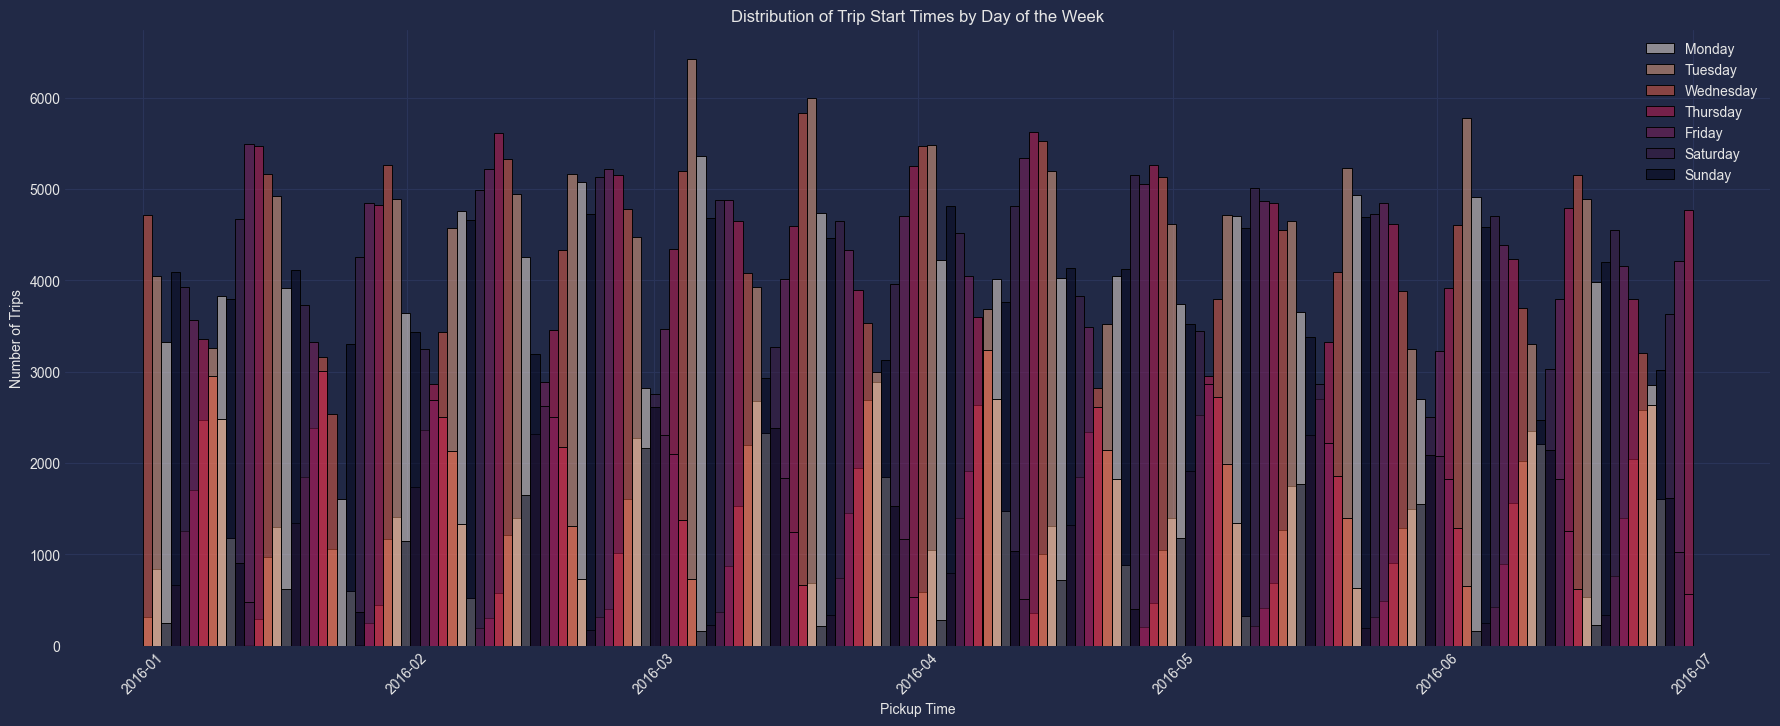

In [32]:
sns.histplot(data=taxi_data, x='pickup_datetime', bins=24*7, hue='day_of_week', kde=False, palette='rocket')
plt.title('Distribution of Trip Start Times by Day of the Week')
plt.xlabel('Pickup Time')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

### What are the average trip durations over the days of the week?


In [33]:
average_duration_by_day = taxi_data.groupby('day_of_week')['trip_duration_minutes'].mean()
average_duration_by_day

day_of_week
0    11.643208
1    12.345859
2    12.539612
3    12.637717
4    12.380902
5    11.747727
6    11.271302
Name: trip_duration_minutes, dtype: float64

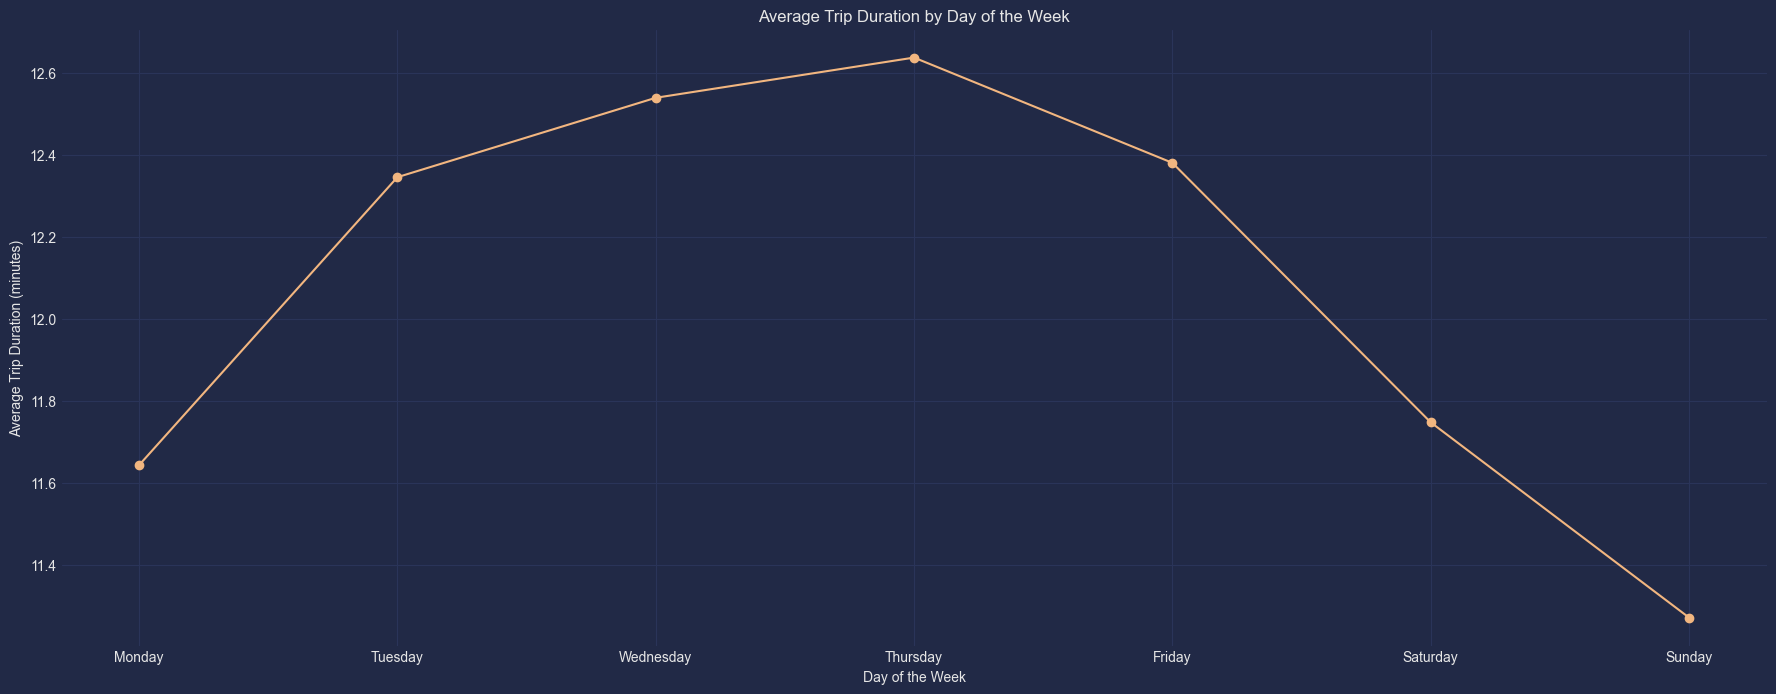

In [34]:
# Plotting the daily average trip duration
plt.plot(average_duration_by_day.index, average_duration_by_day.values, color='#F2B680', marker='o', linestyle='-')
plt.title('Average Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()


---


## Temporal Trends Analysis

This section analyzes longer-term trends in trip durations, looking for seasonal patterns, monthly variations, and the impact of holidays or major events.


### Are there seasonal or monthly trends in trip duration?


In [35]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}

taxi_data['season'] = taxi_data['season'].map(season_mapping)


In [36]:
avg_duration_by_month = taxi_data.groupby('month')['trip_duration'].mean()
avg_duration_by_month

month
1    699.787558
2    706.993772
3    718.920638
4    736.802159
5    743.607782
6    747.406632
Name: trip_duration, dtype: float64

In [37]:
avg_duration_by_season = taxi_data.groupby('season')['trip_duration'].mean()
avg_duration_by_season

season
Spring    732.901312
Summer    747.406632
Winter    703.463251
Name: trip_duration, dtype: float64

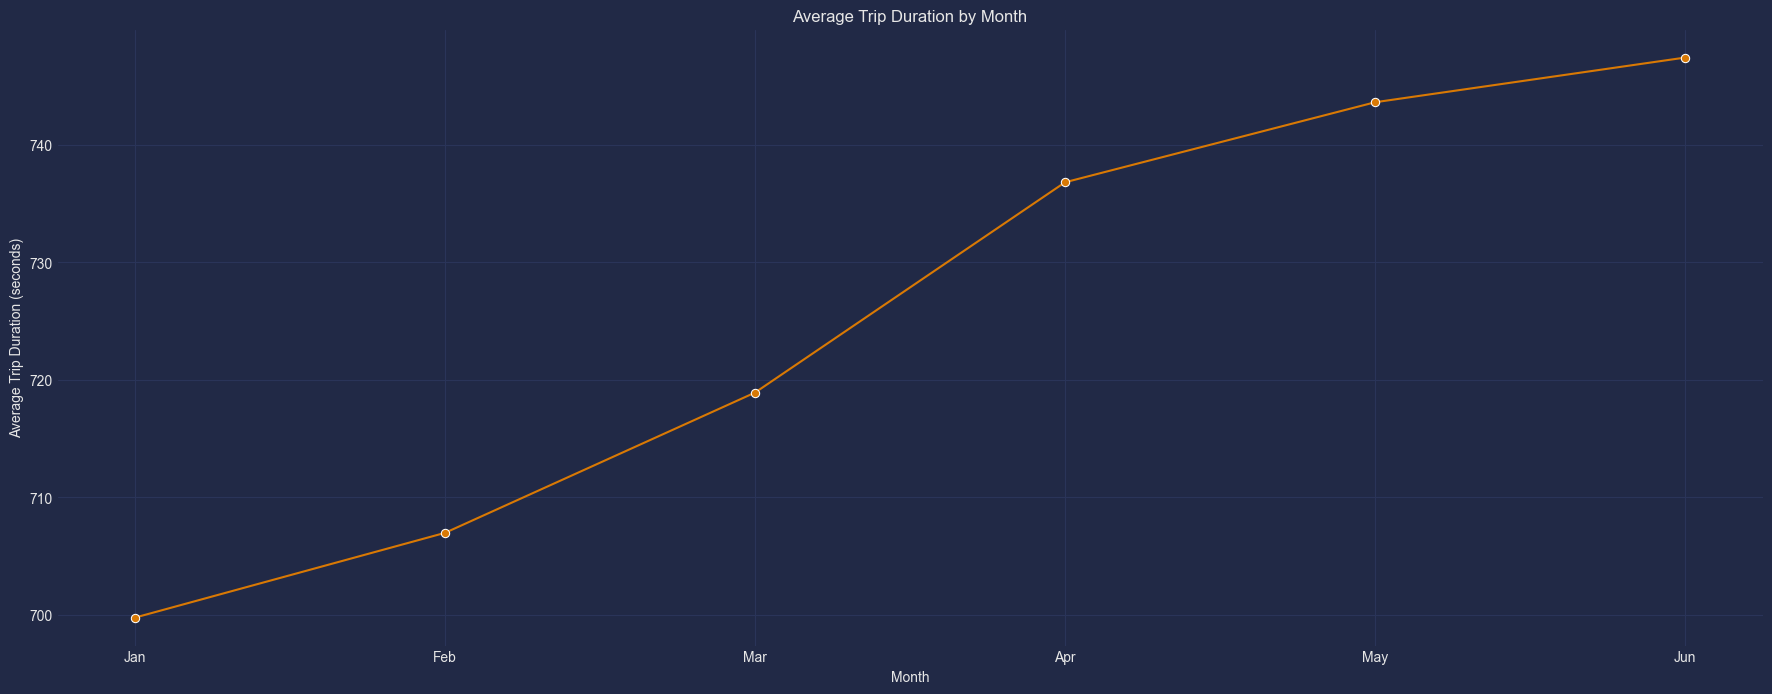

In [38]:
sns.lineplot(data=avg_duration_by_month, marker='o', color='#D97904')
plt.title('Average Trip Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(range(1, 7), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.grid(True)
plt.show()


- Trip durations generally increase from January to June, with the longest average durations observed in June.


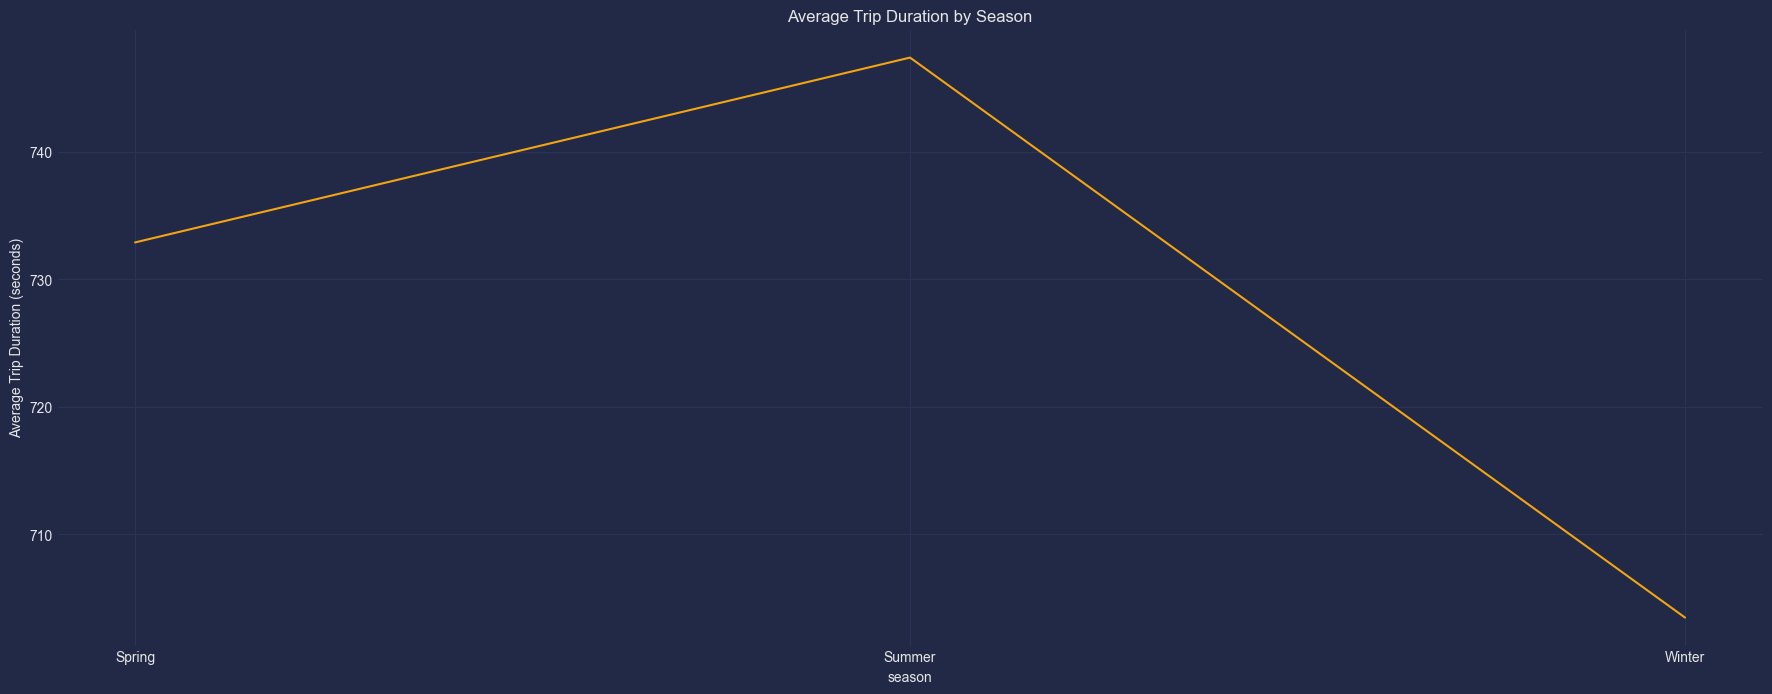

In [39]:
sns.lineplot(data=avg_duration_by_season, color='#F2A413')
plt.title('Average Trip Duration by Season')
plt.ylabel('Average Trip Duration (seconds)')
plt.grid(True)
plt.show()

- Regarding seasons, summer has the highest average trip duration, followed by spring and winter. This could be due to increased travel or tourism during the warmer months, leading to longer trips.


### Can we detect any long-term patterns or anomalies in trip durations over time?


In [40]:
daily_avg_duration = taxi_data.groupby('pickup_datetime')['trip_duration_minutes'].mean()
daily_avg_duration

pickup_datetime
2016-01-01 00:00:53    21.566667
2016-01-01 00:01:20    12.266667
2016-01-01 00:01:47    20.066667
2016-01-01 00:02:06    21.833333
2016-01-01 00:02:45     7.416667
                         ...    
2016-06-30 23:58:38    10.933333
2016-06-30 23:58:47    14.150000
2016-06-30 23:58:52     7.866667
2016-06-30 23:59:09    12.566667
2016-06-30 23:59:37    24.033333
Name: trip_duration_minutes, Length: 906385, dtype: float64

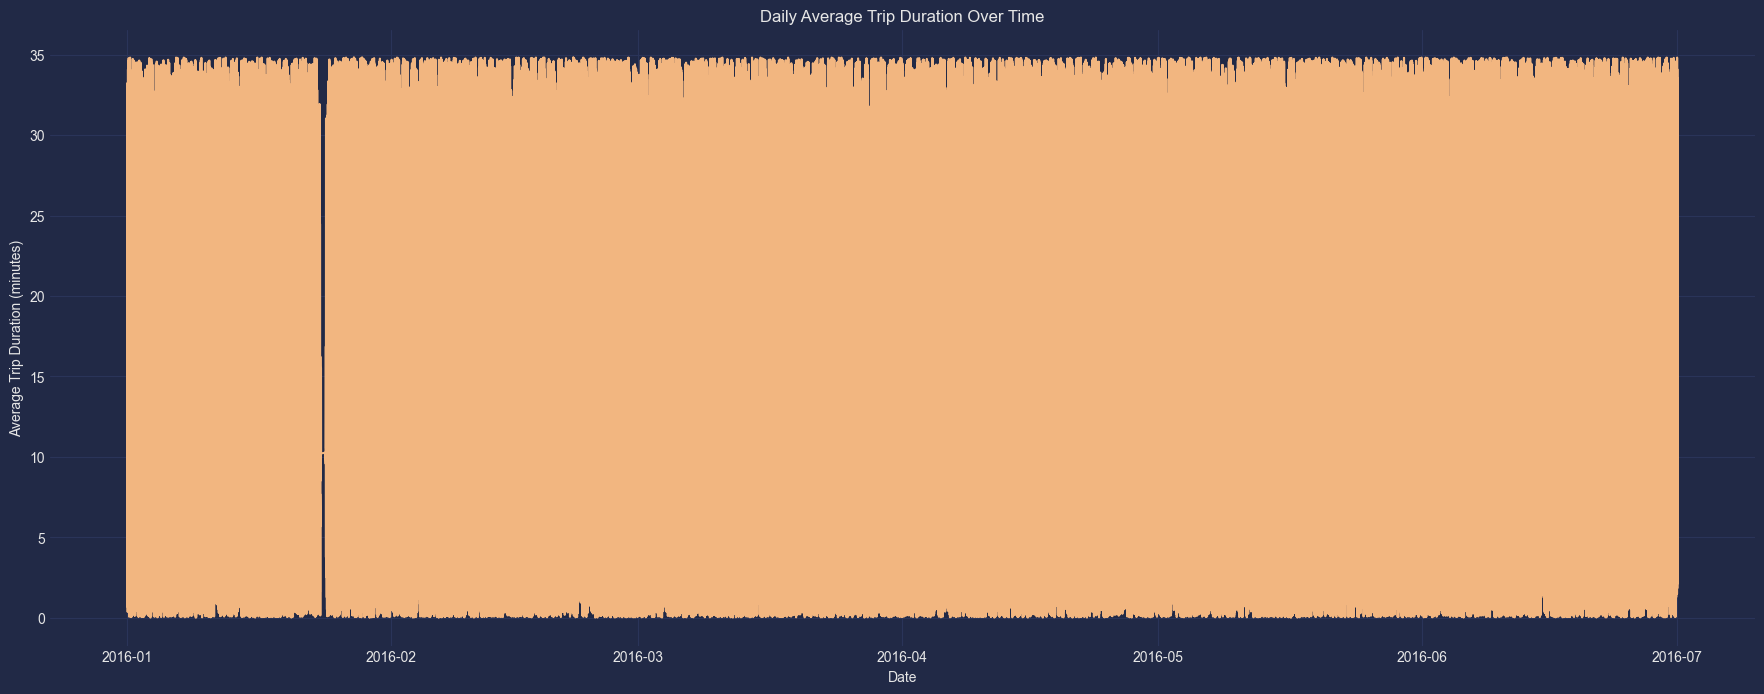

In [41]:
plt.plot(daily_avg_duration.index, daily_avg_duration.values, color='#F2B680')
plt.title('Daily Average Trip Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

In [42]:
daily_avg_duration.mean()

12.090627738519258

In [43]:
max_date = daily_avg_duration.idxmax()

print(f"Date of Maximum Average Trip Duration {daily_avg_duration.max()} in average trip duration: {max_date}")


Date of Maximum Average Trip Duration 34.81666666666667 in average trip duration: 2016-01-01 07:36:42


Remove Outliers


In [44]:
daily_avg_duration = taxi_data.groupby('day_of_week')['trip_duration_minutes'].mean()
daily_avg_duration

day_of_week
0    11.643208
1    12.345859
2    12.539612
3    12.637717
4    12.380902
5    11.747727
6    11.271302
Name: trip_duration_minutes, dtype: float64

**Observations**:

1. **Consistent Weekday Patterns**: Trip durations show a relatively stable pattern throughout the weekdays, with slight variations.

2. **Midweek Peaks**: Wednesday and Thursday exhibit slightly higher average trip durations compared to the rest of the weekdays, indicating potentially increased travel or congestion during midweek periods.

3. **Weekend Decline**: Saturdays and Sundays show lower average trip durations compared to weekdays, suggesting reduced traffic or faster travel times on weekends.

4. **Monday Uptick**: Trip durations start the week with a slightly higher average on Mondays compared to the weekends, possibly due to increased commuting or early week travel.


---


## Spatial Analysis 🗺️

This section explores the geographic aspects of trip data, including common locations and the relationship between distance and trip duration.


### Distance Analysis


#### Calculate the straight-line distance (Haversine distance) and analyze its correlation with trip duration.


In [45]:
def haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6371 * c
    return km


In [46]:
taxi_data['trip_distance'] = taxi_data.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [47]:
correlation = taxi_data['trip_distance'].corr(taxi_data['trip_duration_minutes'])
print(f"Correlation between trip distance and trip duration: {correlation}")

Correlation between trip distance and trip duration: 0.6872235002658009


**Observations**:

1. **Strong Positive Correlation**: The correlation coefficient of 0.6872 indicates a strong positive correlation between trip distance and trip duration. This suggests that as trip distance increases, trip duration tends to increase as well.

2. **Predictive Relationship**: The strong correlation implies that trip distance is a good predictor of trip duration. Knowing the distance of a trip can provide significant insight into how long the trip will take.


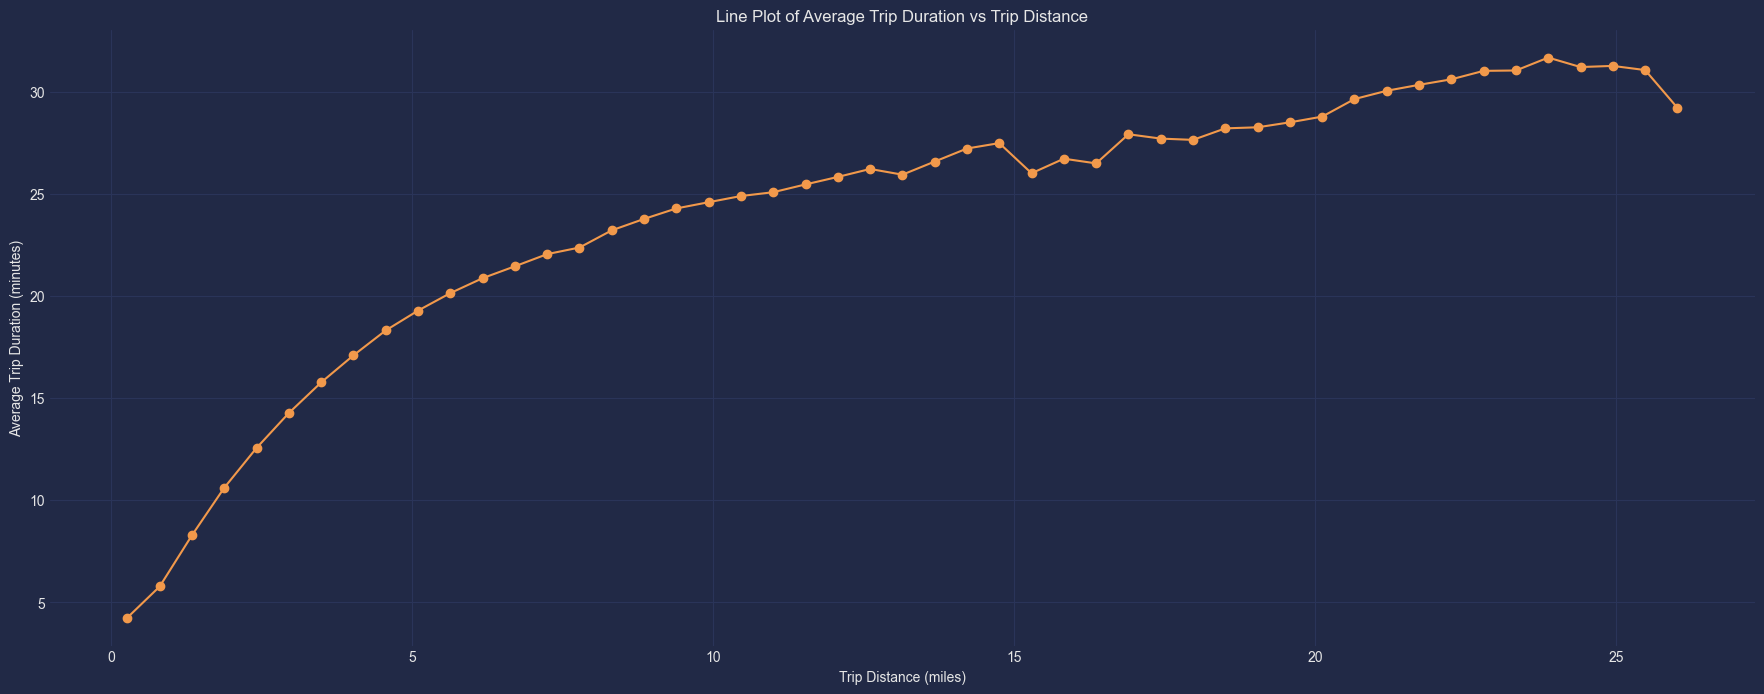

In [48]:
bins = np.linspace(0, taxi_data['trip_distance'].max(), 50)

taxi_data['distance_bin'] = pd.cut(taxi_data['trip_distance'], bins)
mean_durations = taxi_data.groupby('distance_bin')['trip_duration_minutes'].mean()

# Calculate the mid-point of each bin for plotting
bin_midpoints = [bin.mid for bin in mean_durations.index]

plt.plot(bin_midpoints, mean_durations, marker='o', linestyle='-', color='#F2994B')
plt.title('Line Plot of Average Trip Duration vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.show()

**Distance & Time:**

- Longer trips take longer (duh!), but with interesting trends.
- City traffic bumps up travel time more for shorter trips (up to 6 miles).
- Highways see smoother increases in time with distance (likely due to higher speeds).
- Plateaus (minimal time increase despite distance) suggest efficient stretches (10.7-15.6 miles).
- Very long trips (over 16 miles) face more delays, causing another rise in time.

**Data Points:**

- Dips in travel time (like at 12.8-13.4 miles) could be due to route quirks or outliers.
- Variability in long-trip times (over 18 miles) might reflect fewer data points or unpredictable conditions.


### Geographic Analysis 🤔🗺️


#### What are the most common pickup and drop-off locations? 📌


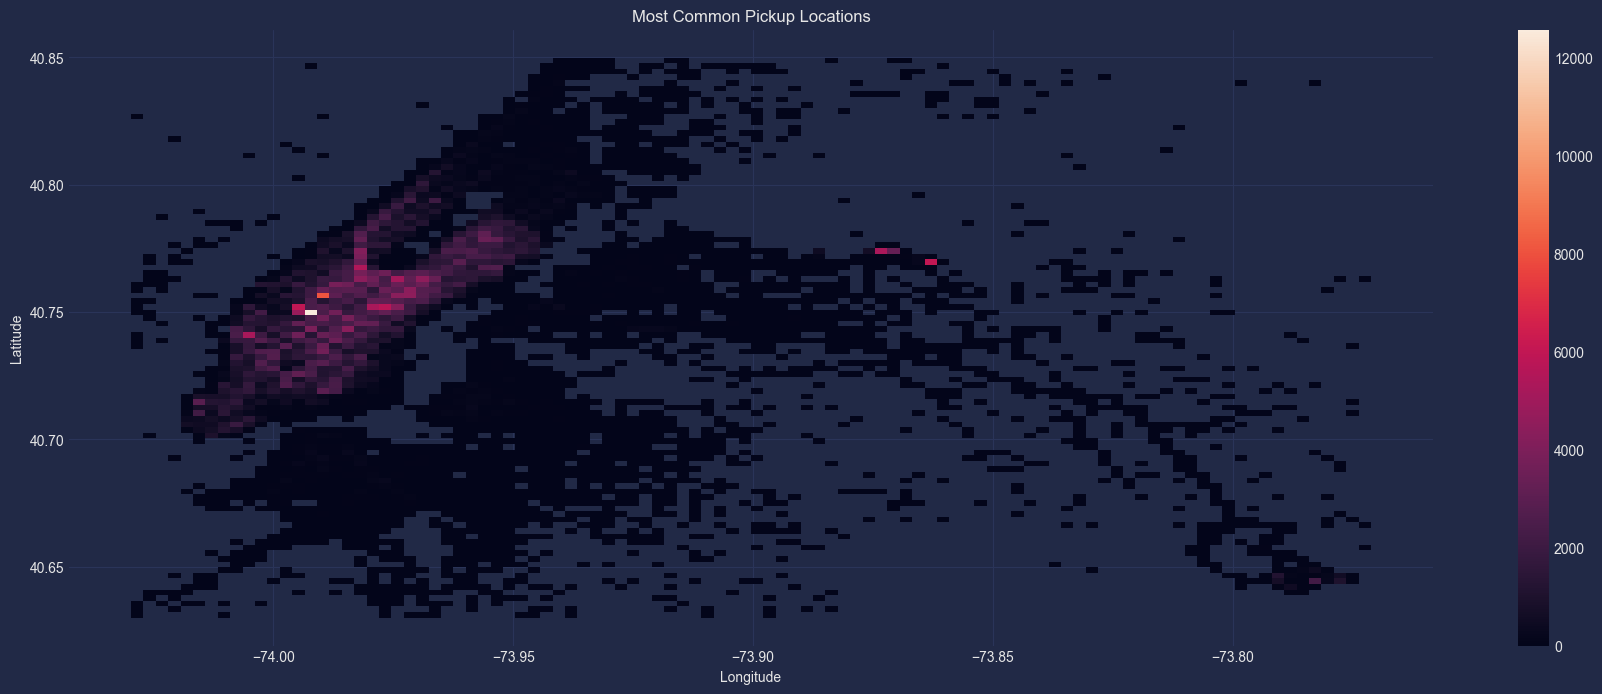

In [49]:
sns.histplot(x=taxi_data['pickup_longitude'], y=taxi_data['pickup_latitude'], bins=100, cmap='rocket', cbar=True)
plt.title('Most Common Pickup Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

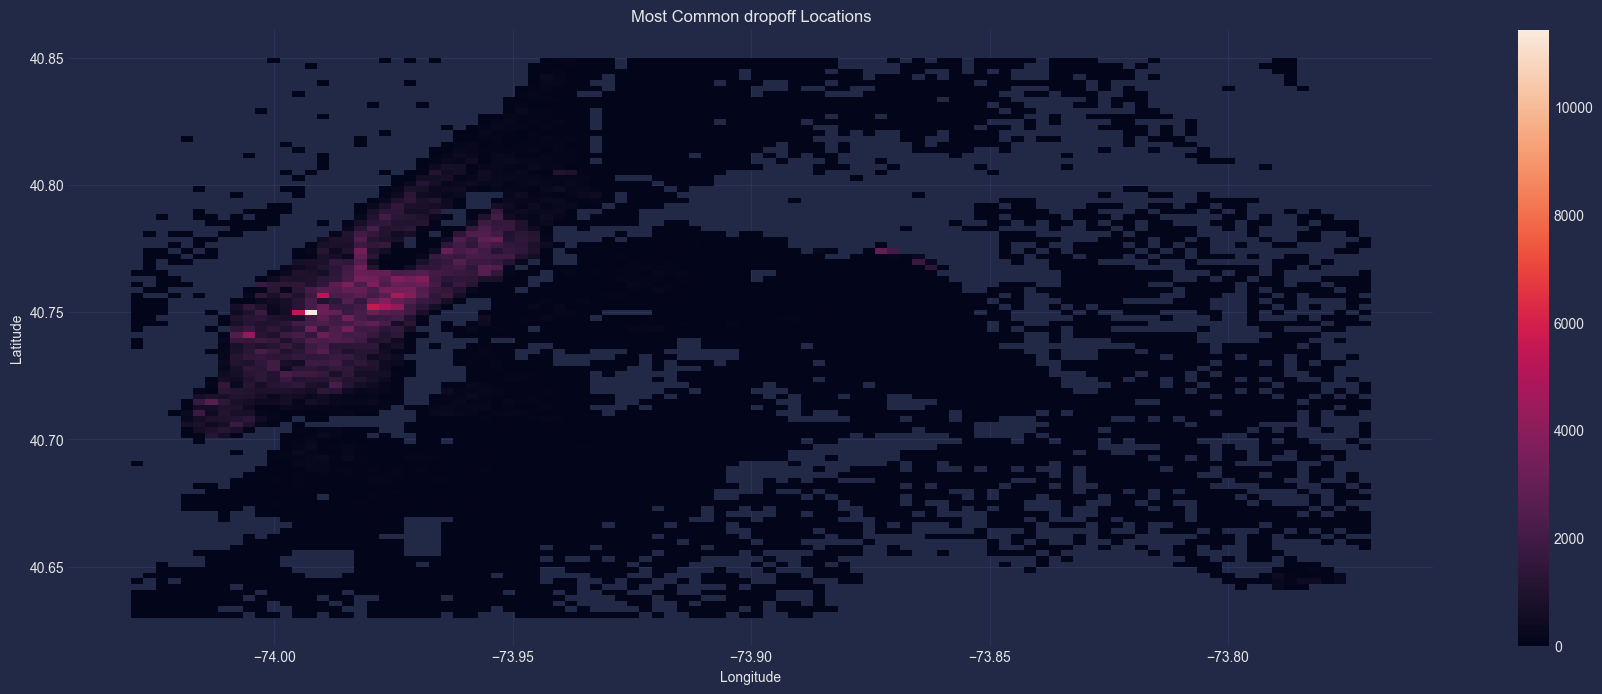

In [50]:
sns.histplot(x=taxi_data['dropoff_longitude'], y=taxi_data['dropoff_latitude'], bins=100, cmap='rocket', cbar=True)
plt.title('Most Common dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### How does trip duration vary by geographic location?


In [73]:
taxi_data_sample = taxi_data.sample(150000)

In [1]:
# fig = px.scatter_mapbox(taxi_data_sample, lat="pickup_latitude", lon="pickup_longitude", 
#                         color="trip_distance",size='trip_duration_minutes',
#                         color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,hover_data=["trip_distance", "trip_duration_minutes"])

# fig.update_layout(mapbox_style="open-street-map")
# # fig.update_layout(mapbox_style="cartography") 
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()


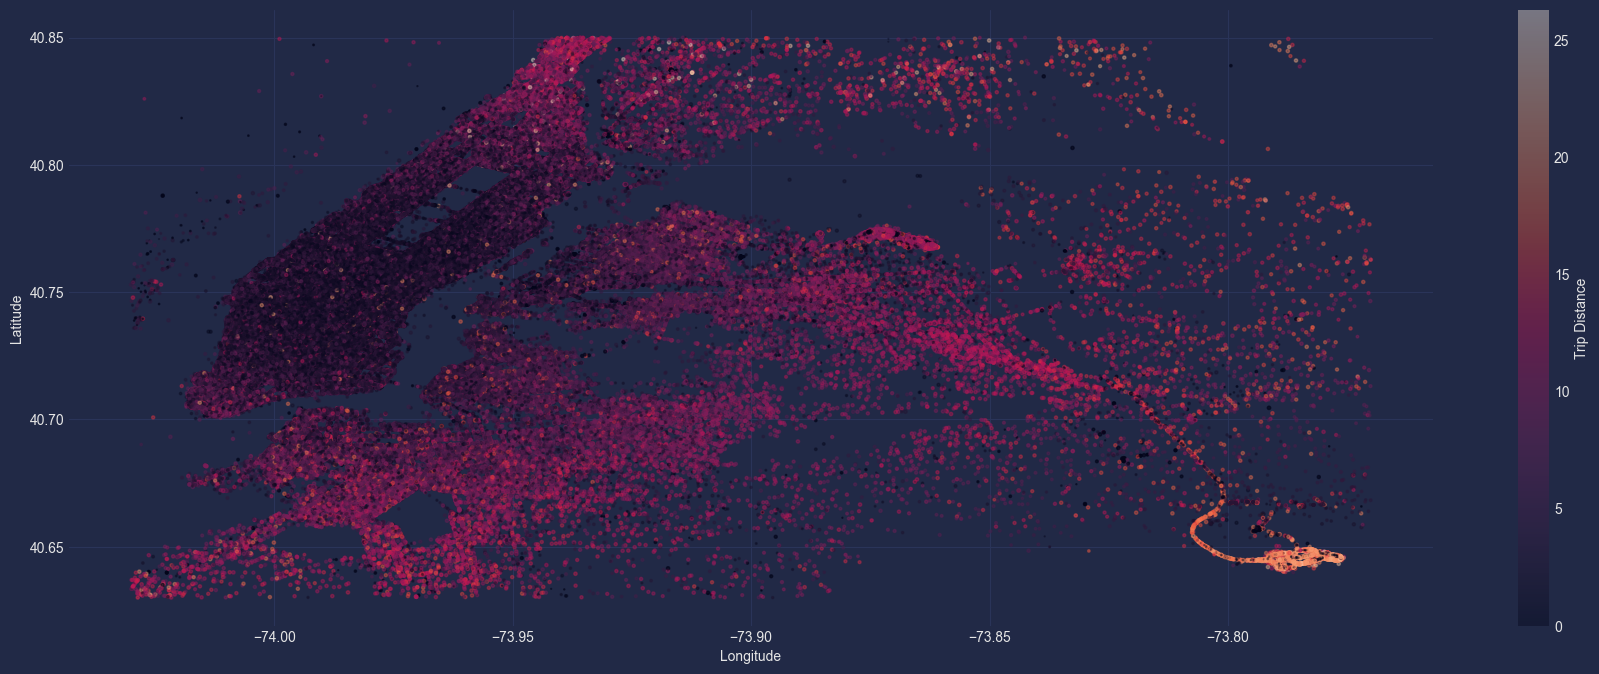

In [53]:

longitude = list(taxi_data.pickup_longitude) + list(taxi_data.dropoff_longitude)
latitude = list(taxi_data.pickup_latitude) + list(taxi_data.dropoff_latitude)

trip_distance = list(taxi_data.trip_distance) * 2
trip_duration_minutes = list(taxi_data.trip_duration_minutes) * 2


sc = plt.scatter(longitude, latitude, c=trip_distance, s=np.sqrt(trip_duration_minutes), cmap='rocket', alpha=0.4)

plt.colorbar(sc, label='Trip Distance')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


---


## Speed Analysis 🫏


In [54]:
def calculate_trip_speed(df):
    """Calculate the average speed of the trip in km/h."""
    df['trip_speed'] = df['trip_distance'] / (df['trip_duration'] / 3600)
    return df
taxi_data = calculate_trip_speed(taxi_data)

### Overall Distribution of Trip Speeds


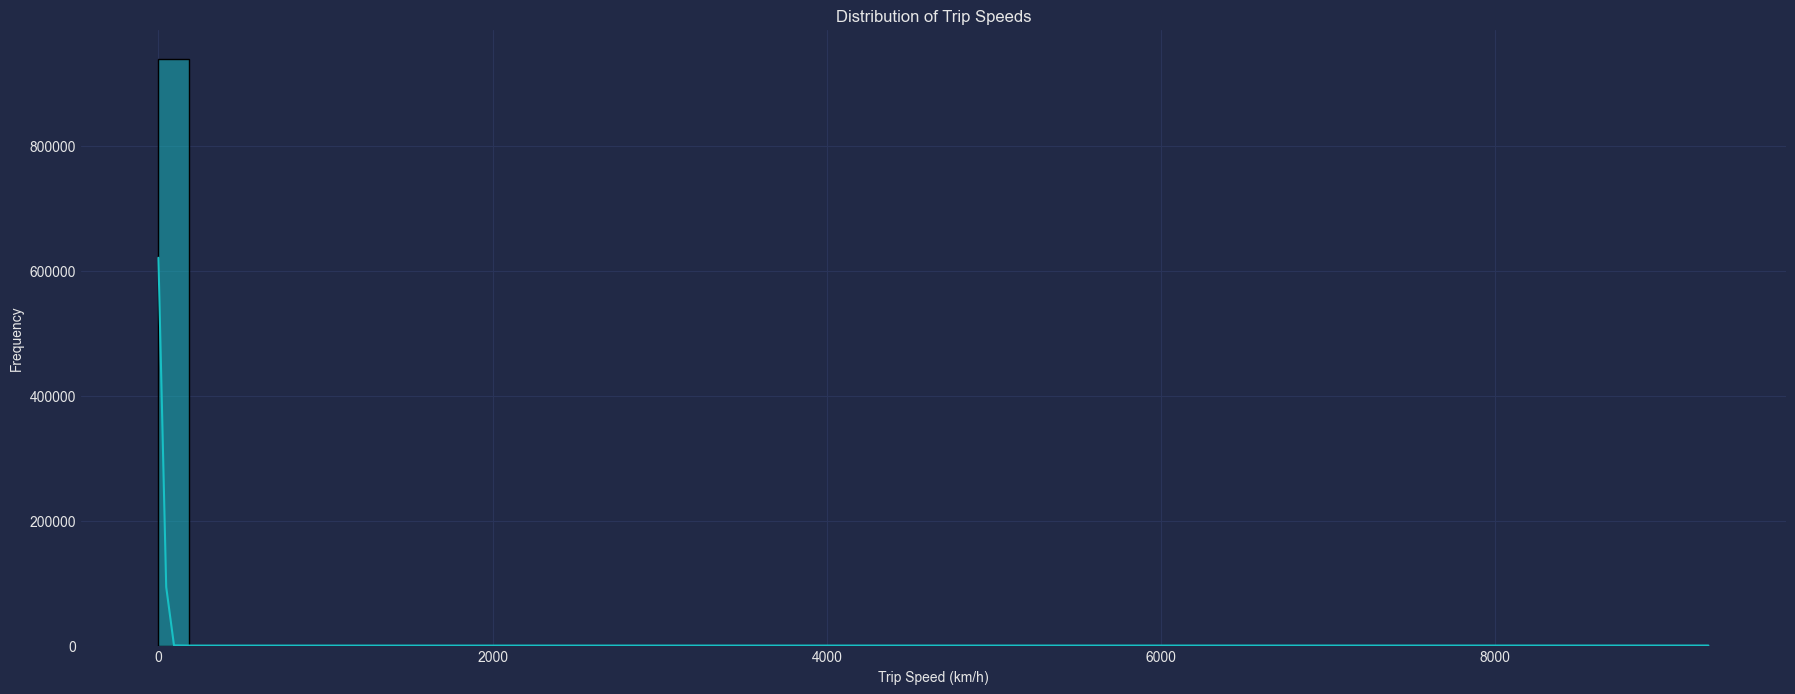

In [55]:
sns.histplot(taxi_data['trip_speed'], bins=50, kde=True)
plt.title('Distribution of Trip Speeds')
plt.xlabel('Trip Speed (km/h)')
plt.ylabel('Frequency')
plt.show()


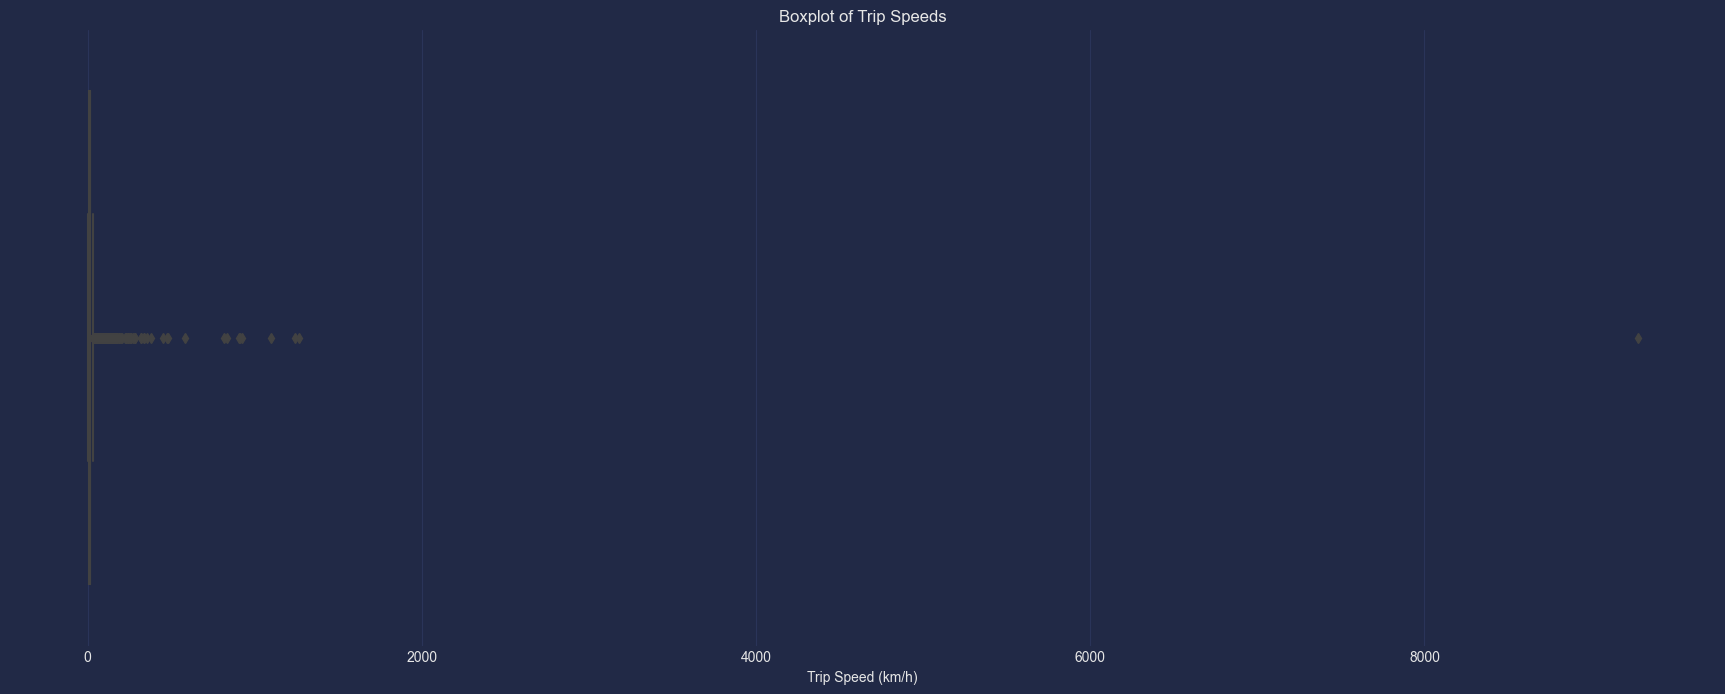

In [56]:
sns.boxplot(x=taxi_data['trip_speed'])
plt.title('Boxplot of Trip Speeds')
plt.xlabel('Trip Speed (km/h)')
plt.show()

In [57]:
taxi_data= remove_outliers(taxi_data,'trip_speed')

Lower Bound: 0
Upper Bound: 29.99627349852311


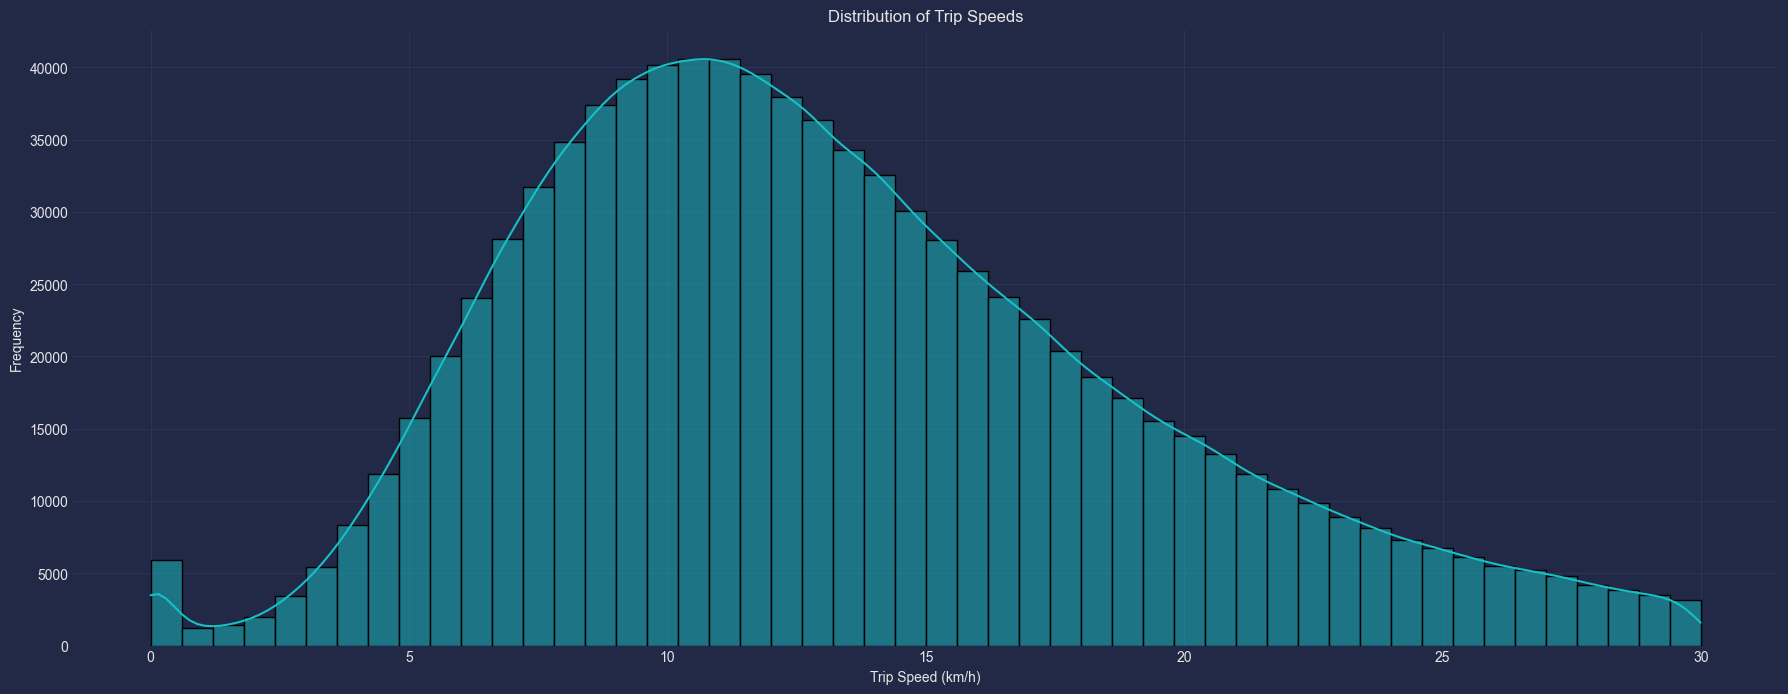

In [58]:
sns.histplot(taxi_data['trip_speed'], bins=50, kde=True)
plt.title('Distribution of Trip Speeds')
plt.xlabel('Trip Speed (km/h)')
plt.ylabel('Frequency')
plt.show()


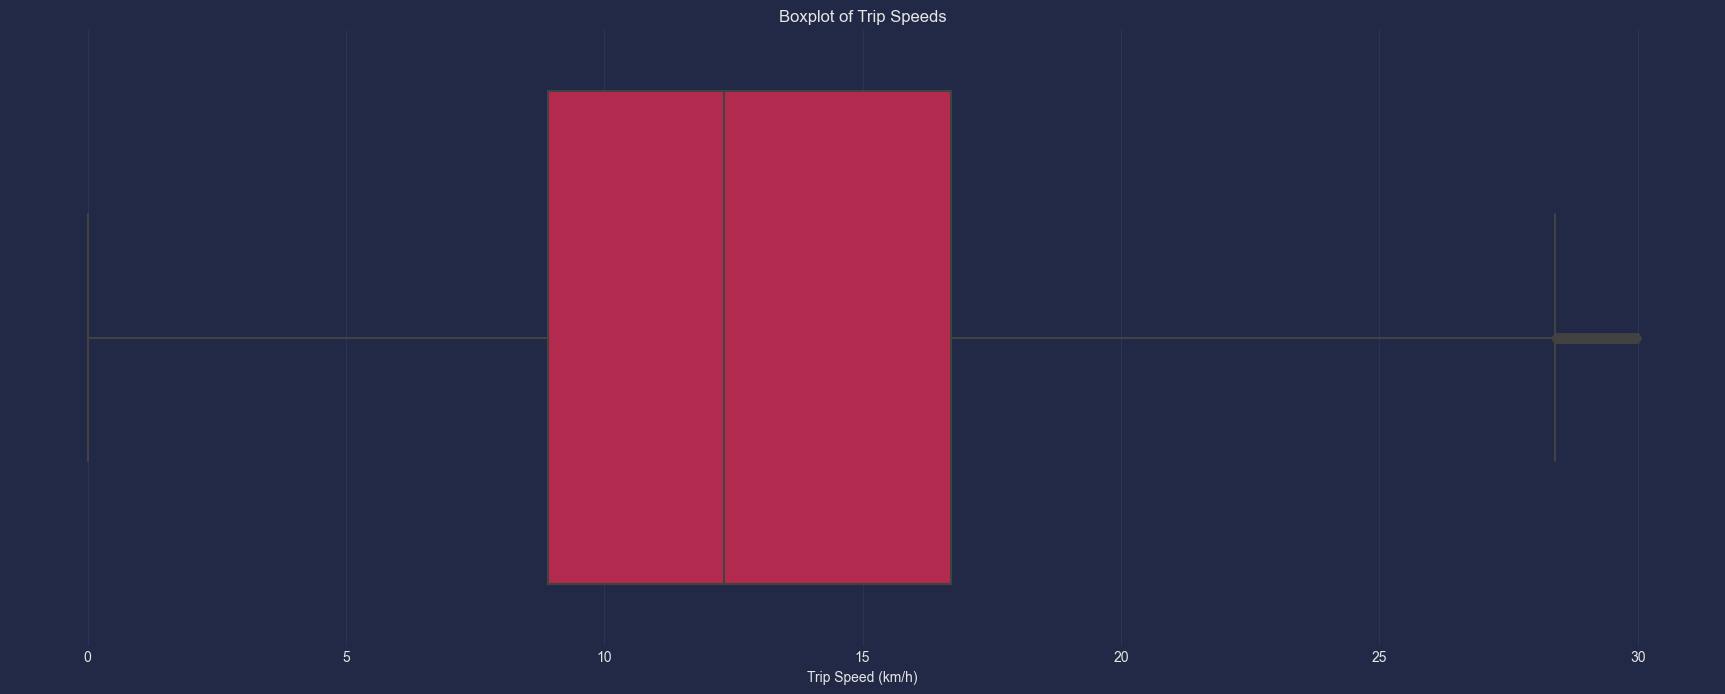

In [59]:
sns.boxplot(x=taxi_data['trip_speed'],color='#ca134567')
plt.title('Boxplot of Trip Speeds')
plt.xlabel('Trip Speed (km/h)')
plt.show()

#### 1. Trip Speed by Time of Day


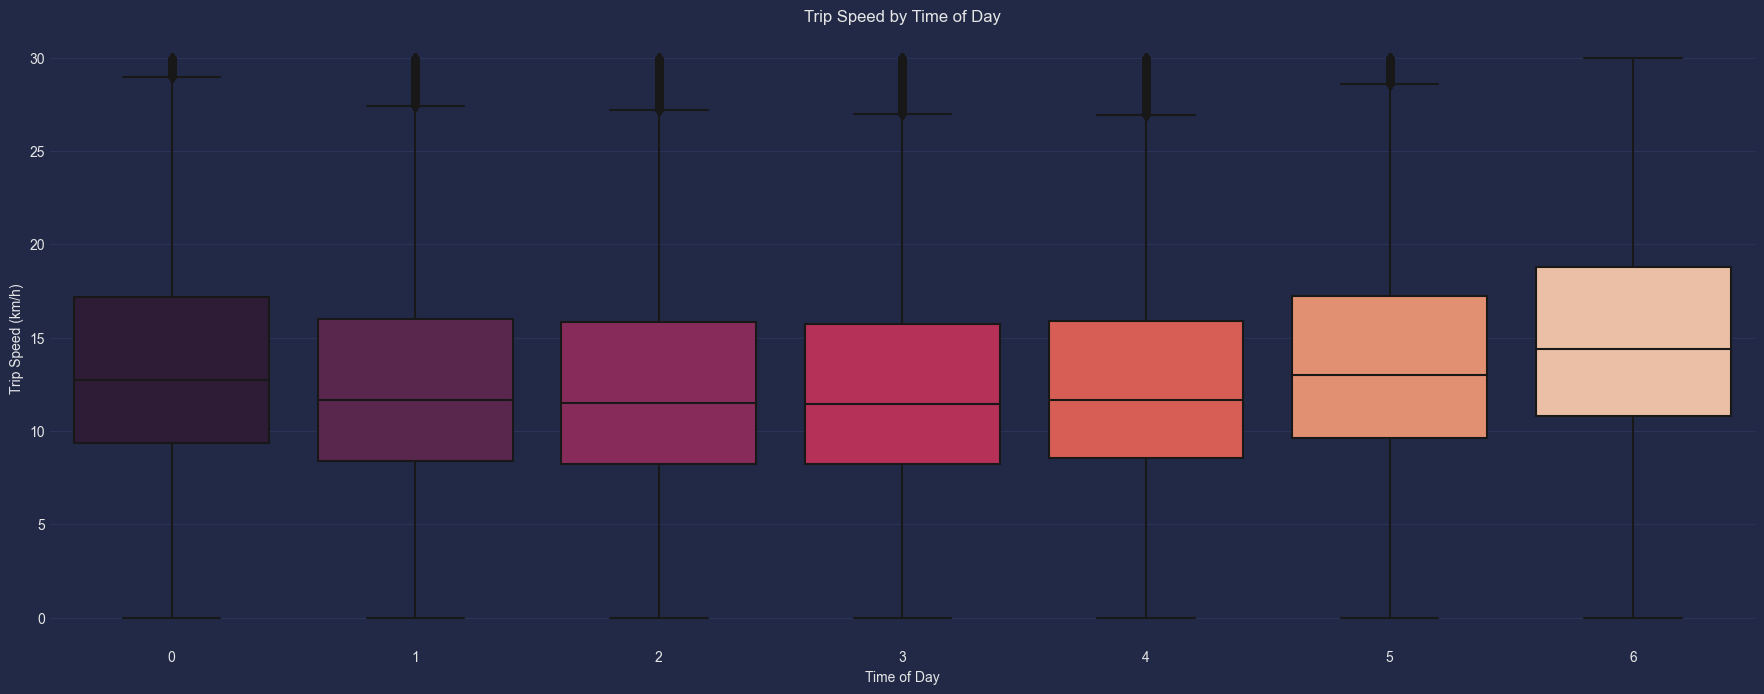

In [60]:
sns.boxplot(x='day_of_week', y='trip_speed', data=taxi_data,palette='rocket')
plt.title('Trip Speed by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trip Speed (km/h)')
plt.show()

#### 2. Trip Speed on Weekdays vs. Weekends


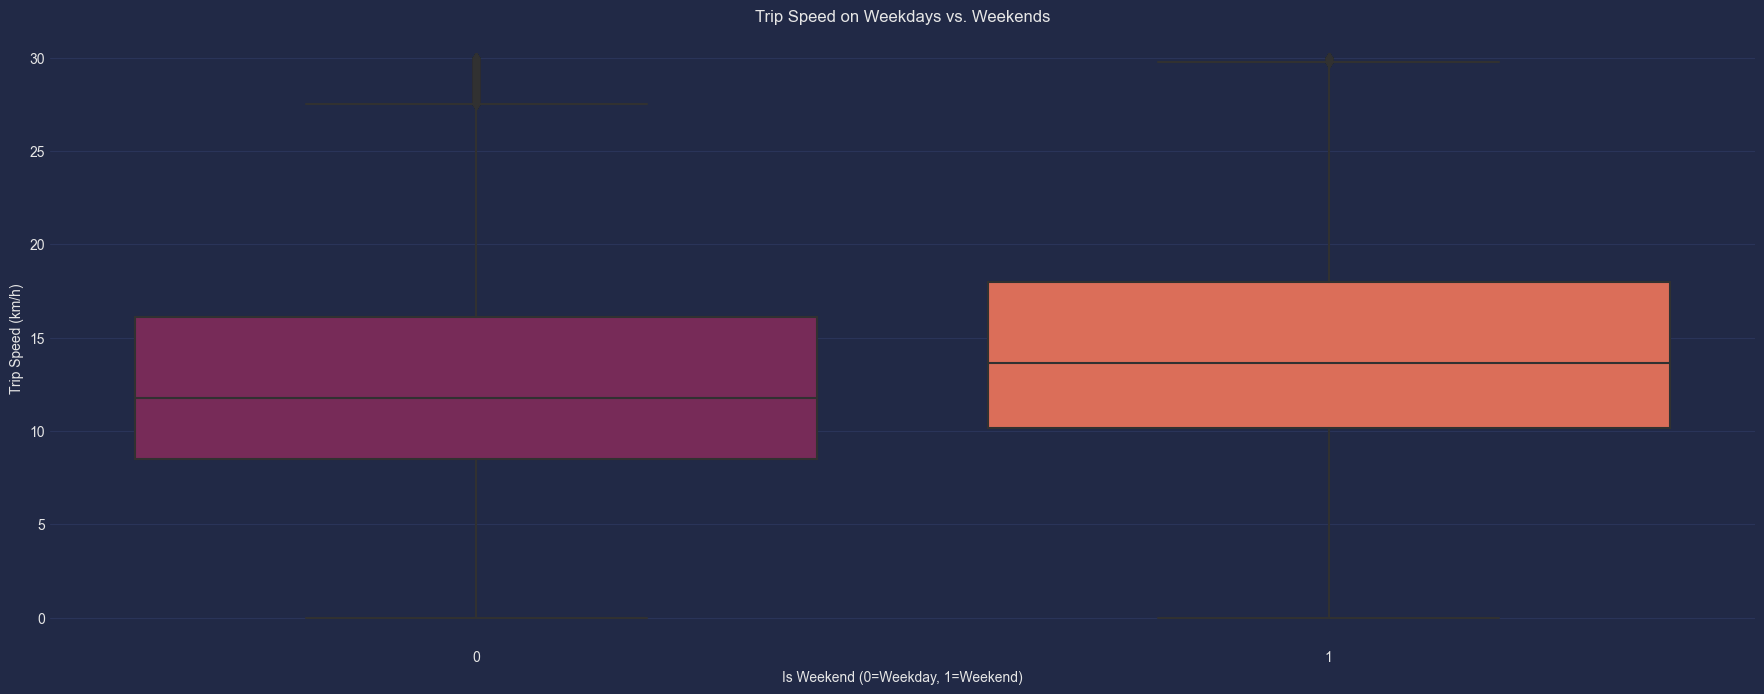

In [61]:
sns.boxplot(x='is_weekend', y='trip_speed', data=taxi_data, palette='rocket')
plt.title('Trip Speed on Weekdays vs. Weekends')
plt.xlabel('Is Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Trip Speed (km/h)')
plt.show()

#### 3. Trip Speed by Month


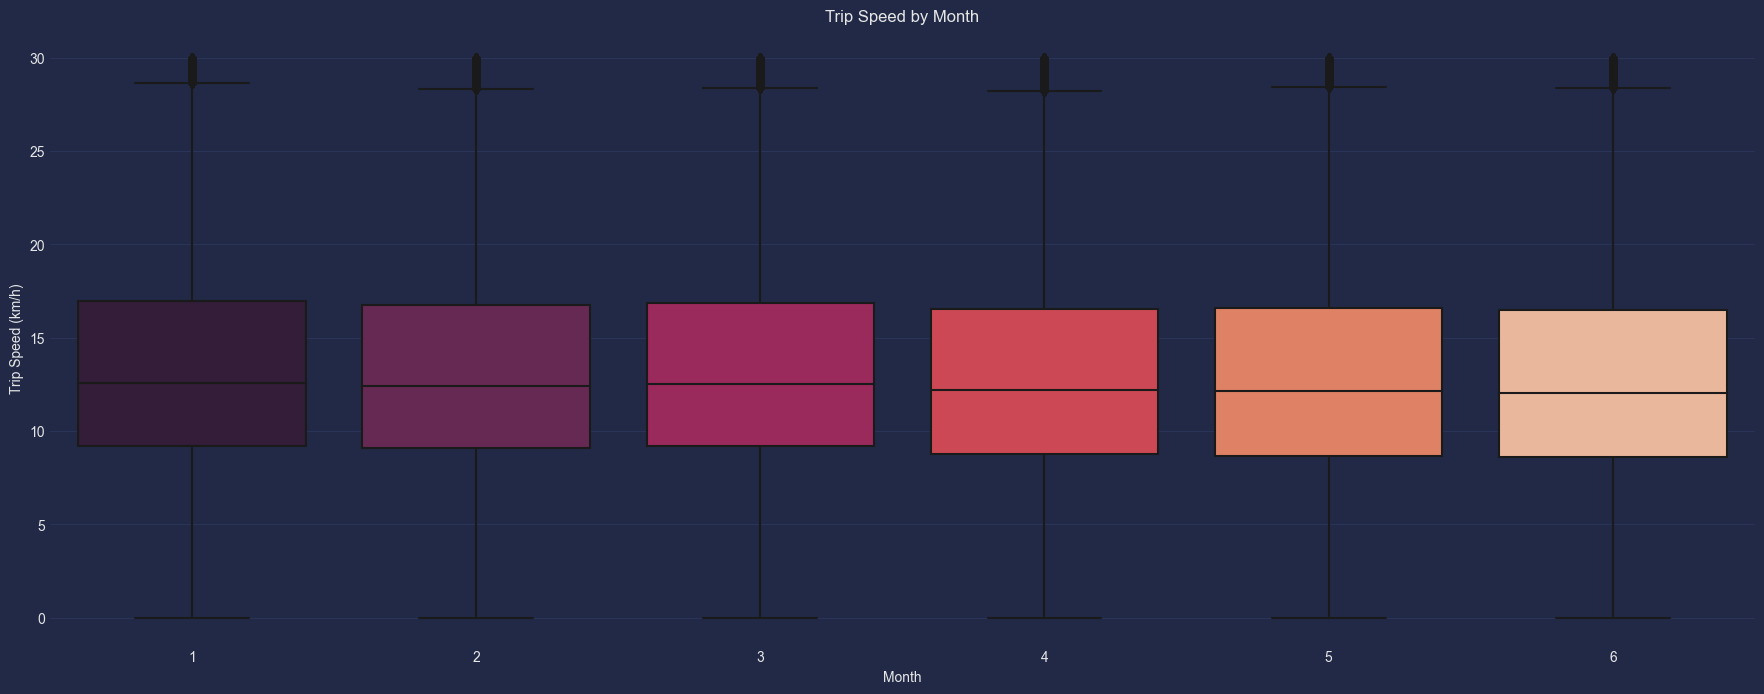

In [62]:
sns.boxplot(x='month', y='trip_speed', data=taxi_data ,palette='rocket')
plt.title('Trip Speed by Month')
plt.xlabel('Month')
plt.ylabel('Trip Speed (km/h)')
plt.show()

#### Trip Speed vs. Trip Distance


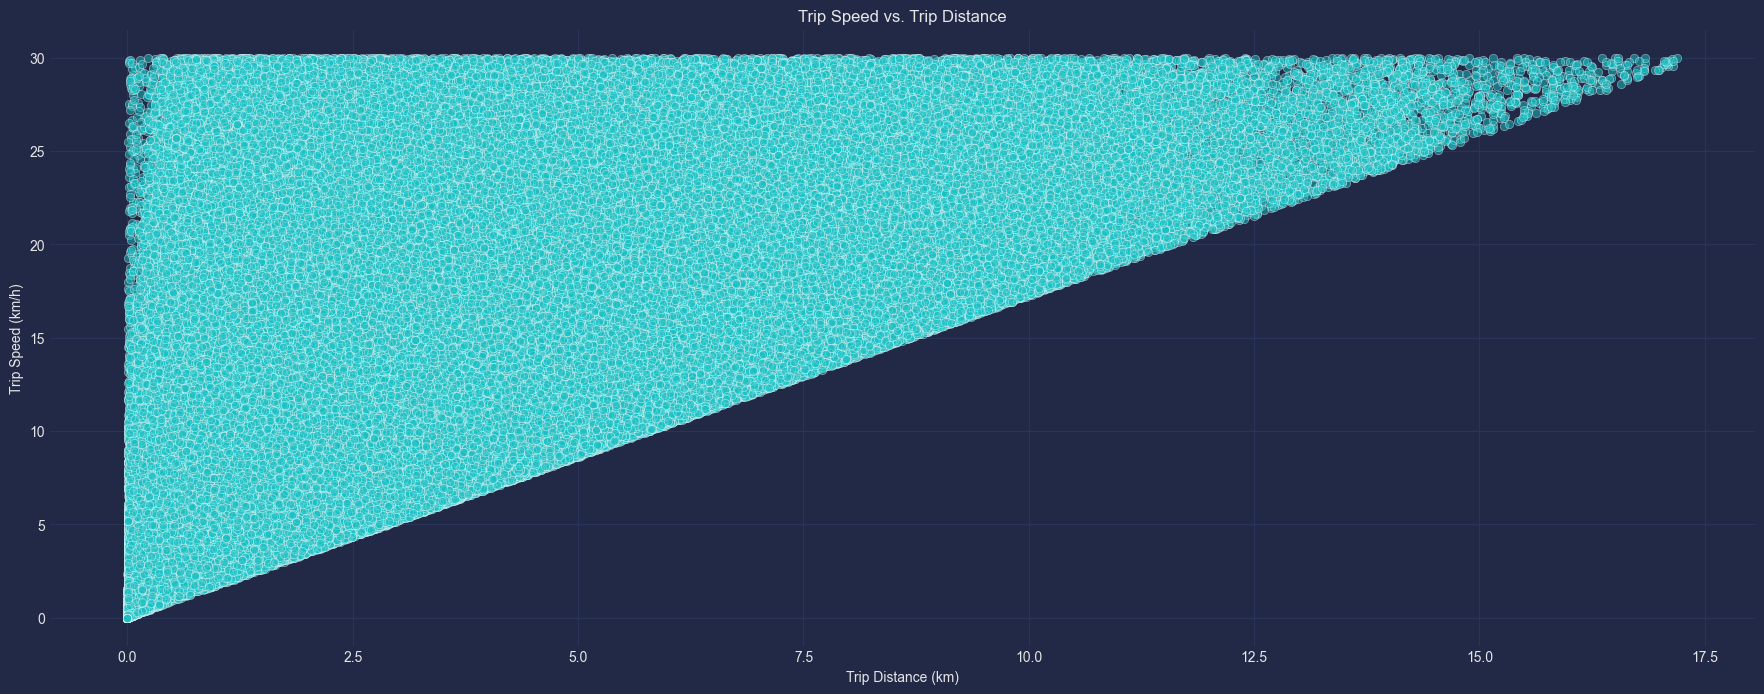

In [63]:
sns.scatterplot(x='trip_distance', y='trip_speed', data=taxi_data, alpha=0.5)
plt.title('Trip Speed vs. Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Speed (km/h)')
plt.show()

In [64]:
correlation_distance_speed = taxi_data['trip_speed'].corr(taxi_data['trip_distance'])
print(f"Correlation between Trip Speed and Trip Distance: {correlation_distance_speed:.2f}")

Correlation between Trip Speed and Trip Distance: 0.52


In [65]:
average_trip_speed = taxi_data['trip_speed'].mean()
print(f"The average trip speed for all trips is {average_trip_speed:.2f} km/h")

The average trip speed for all trips is 13.15 km/h


In [66]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'trip_duration_minutes', 'year', 'month', 'season', 'day_of_week',
       'weekday', 'is_weekend', 'pickup_hour', 'is_night_time',
       'late_night_time', 'pickup_date', 'pickup_cluster_label',
       'dropoff_cluster_label', 'weekend', 'trip_distance', 'distance_bin',
       'trip_speed'],
      dtype='object')

In [67]:
hourly_average_speeds = taxi_data.groupby('pickup_hour')['trip_speed'].mean()
print(list(hourly_average_speeds))

[15.628495227648465, 16.32592088077015, 16.777706063517464, 17.30916830937055, 18.170166249643938, 19.194201576914725, 17.851251271123225, 14.471781547119472, 12.088110037801835, 11.736465954905674, 11.896154942039114, 11.560149184527809, 11.43502018763139, 11.547796448391626, 11.337262996134484, 11.318784977016335, 11.81200293587276, 11.863736344420051, 11.899008991211598, 12.712636299094214, 13.911270300523592, 14.406257303571564, 14.58963277318013, 15.136765463491518]


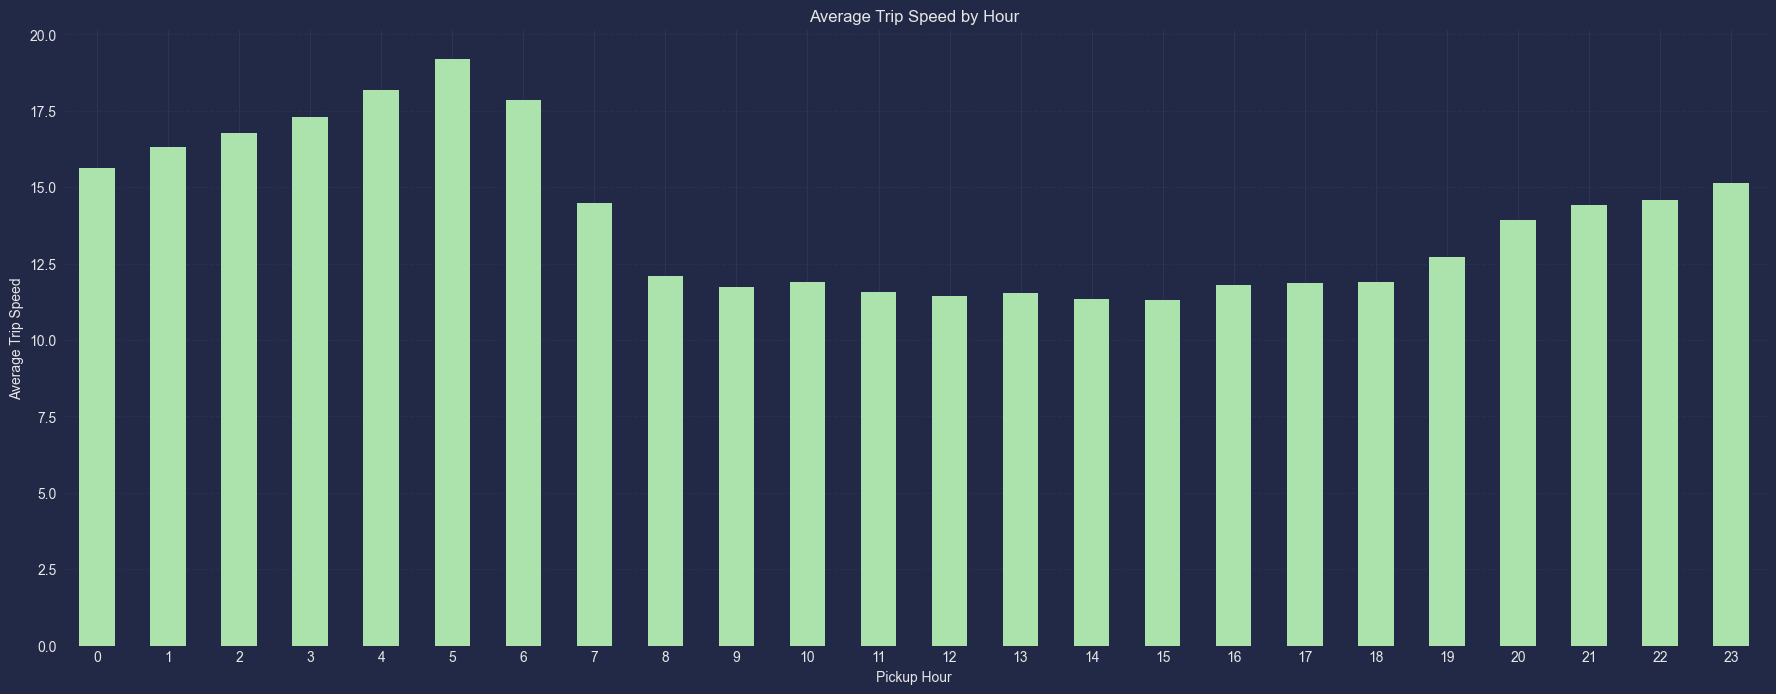

In [72]:
hourly_average_speeds.plot(kind='bar', color='#ace2ac')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Speed' )
plt.title('Average Trip Speed by Hour')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---


## Passenger Analysis 🧑‍🤝‍🧑📊

This section explores the relationship between trip duration, passenger count, and trip distance.


### How does trip duration correlate with passenger count?


In [86]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = pearsonr(taxi_data['trip_duration_minutes'], taxi_data['passenger_count'])

print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", pearson_p_value)


Pearson correlation coefficient: 0.01183959319273926
p-value: 2.2852449766853457e-29


**Observations**:

- **Weak Correlation**: The Pearson correlation coefficient of 0.0118 suggests a very weak positive correlation between trip duration and passenger count. This indicates that there is almost no linear relationship between these two variables. In simpler terms, knowing the number of passengers doesn't tell us much about how long the trip will take, and vice versa.

---

This update reflects the actual values from your provided output.


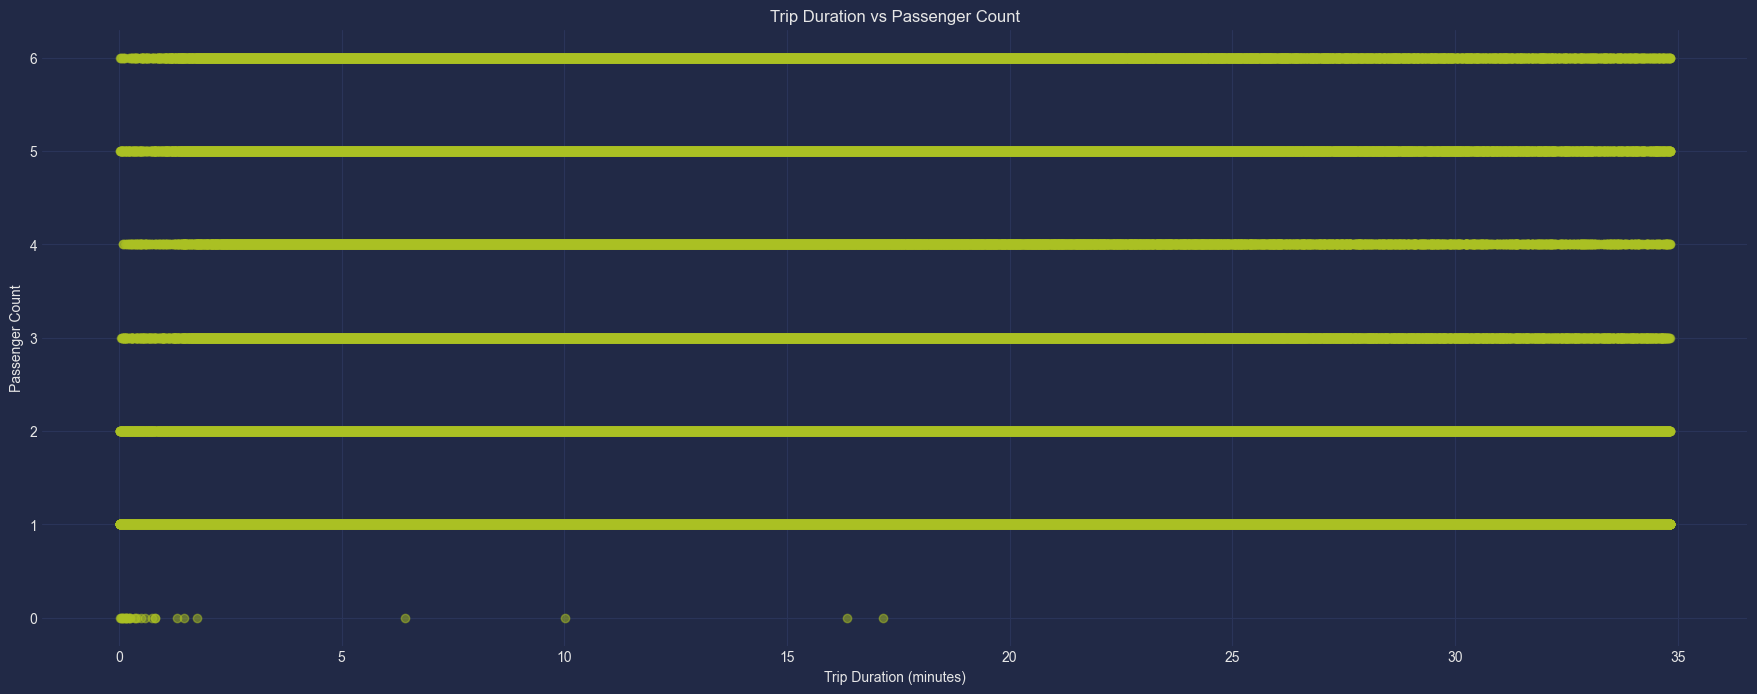

In [74]:
plt.scatter(taxi_data['trip_duration_minutes'], taxi_data['passenger_count'], alpha=0.5,color='#abc123')
plt.title('Trip Duration vs Passenger Count')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

### Do trips with more passengers tend to be longer?


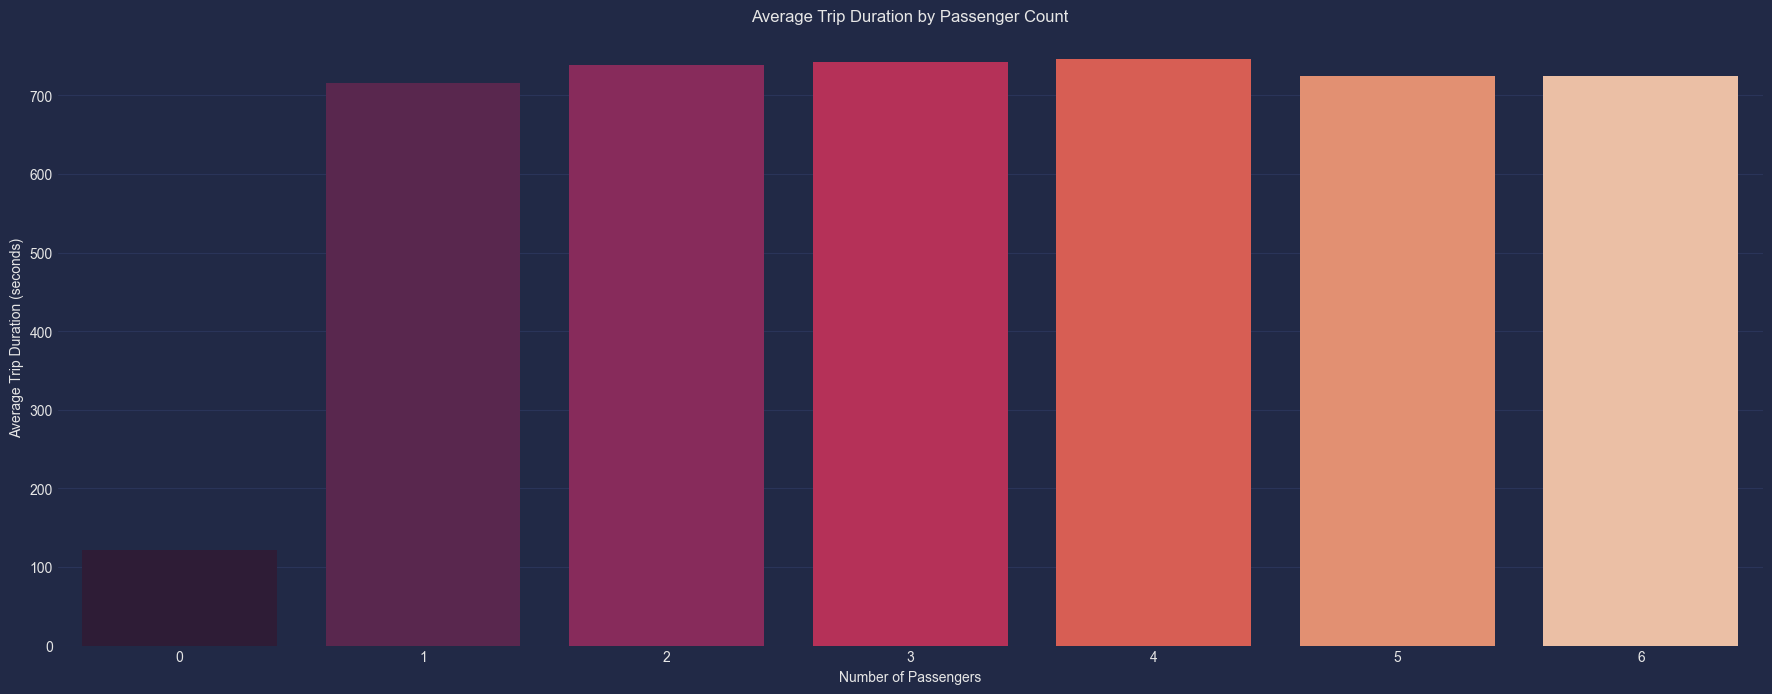

In [75]:
avg_duration_by_passenger_count = taxi_data.groupby('passenger_count')['trip_duration'].mean()

sns.barplot(x=avg_duration_by_passenger_count.index, y=avg_duration_by_passenger_count.values, palette='rocket')
plt.title('Average Trip Duration by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

- The trend suggests that, on average, trips with more passengers tend to be slightly longer. However, the difference in average trip duration between different passenger counts is relatively small.


### What is the relationship between passenger count and trip distance?


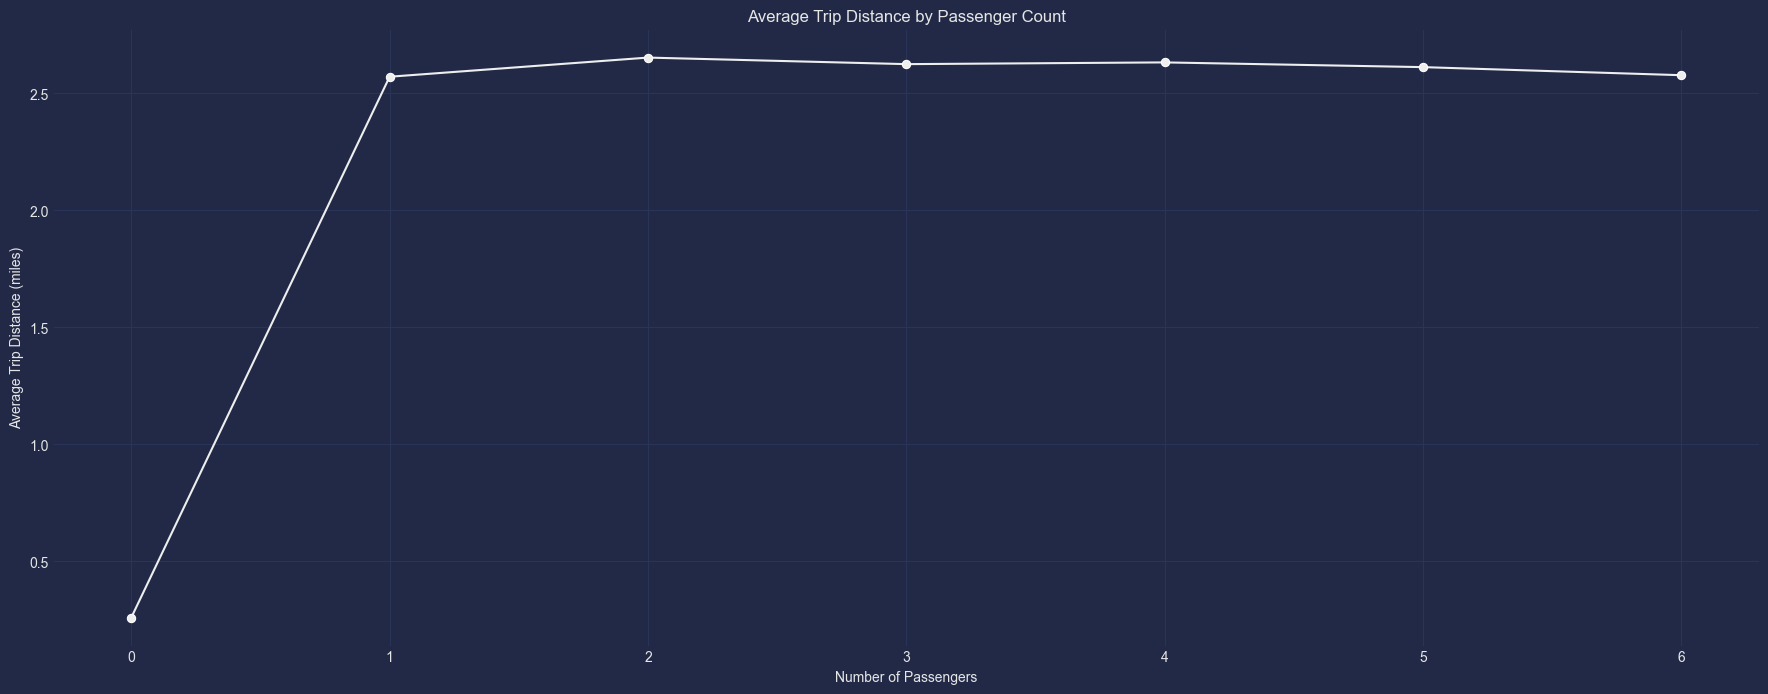

In [76]:
avg_distance_by_passenger_count = taxi_data.groupby('passenger_count')['trip_distance'].mean()

sns.lineplot(x=avg_distance_by_passenger_count.index, y=avg_distance_by_passenger_count.values, marker='o', color='#eee')
plt.title('Average Trip Distance by Passenger Count')
plt.xlabel('Number of Passengers')
plt.ylabel('Average Trip Distance (miles)')
plt.grid(True)
plt.show()

- Based on these averages, there doesn't appear to be a significant relationship between passenger count and trip distance.


---


## Vendor Analysis 🚖💼

This section aims to compare trip durations between different vendors, specifically Vendor 1 and Vendor 2, to identify any significant differences.


### Compare trip durations and Distance between different vendors.


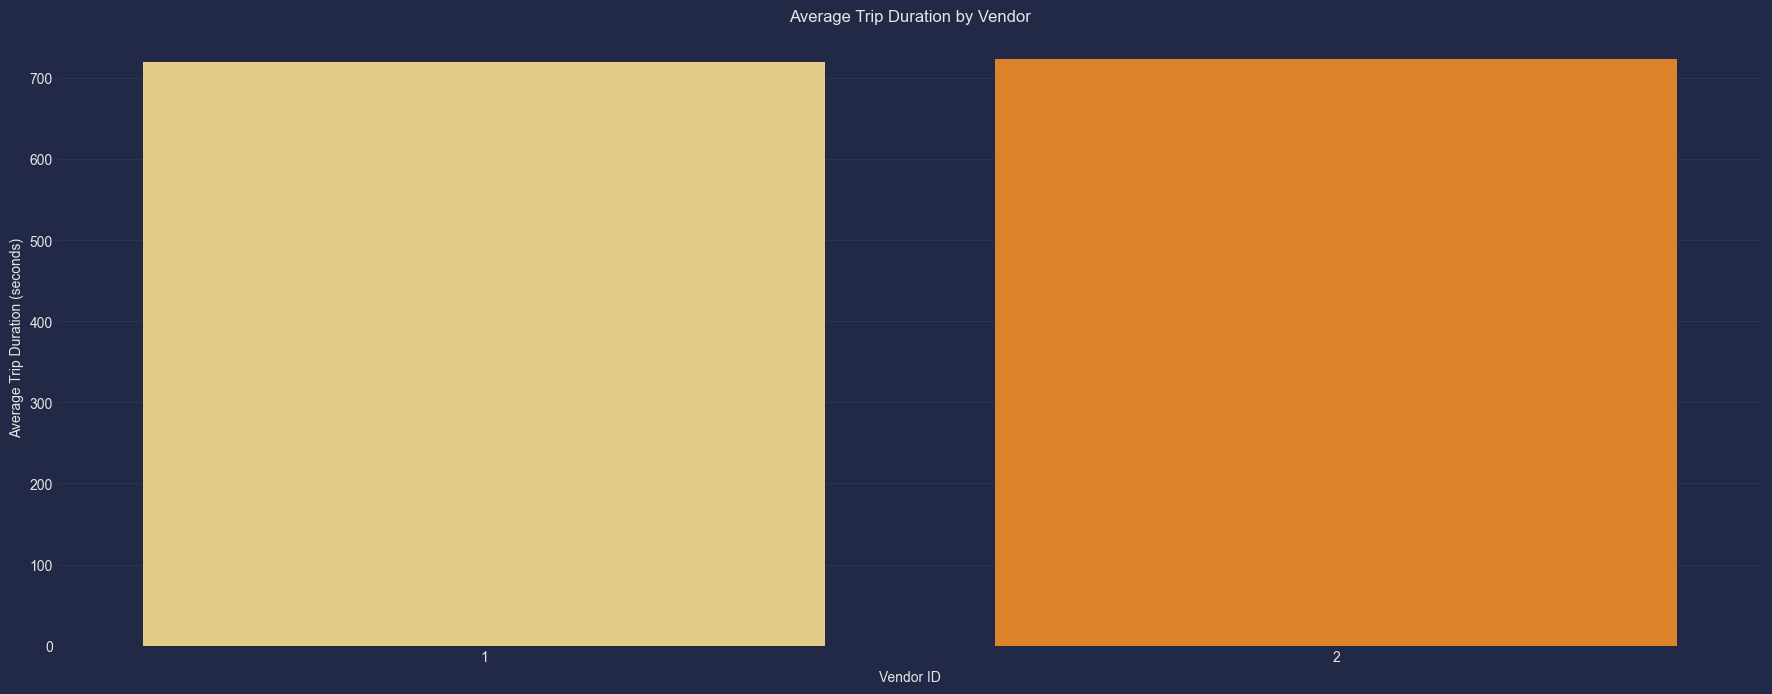

In [77]:
avg_duration_by_vendor = taxi_data.groupby('vendor_id')['trip_duration'].mean()
sns.barplot(x=avg_duration_by_vendor.index, y=avg_duration_by_vendor.values, palette=['#F2D479','#F9840D'])
plt.title('Average Trip Duration by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

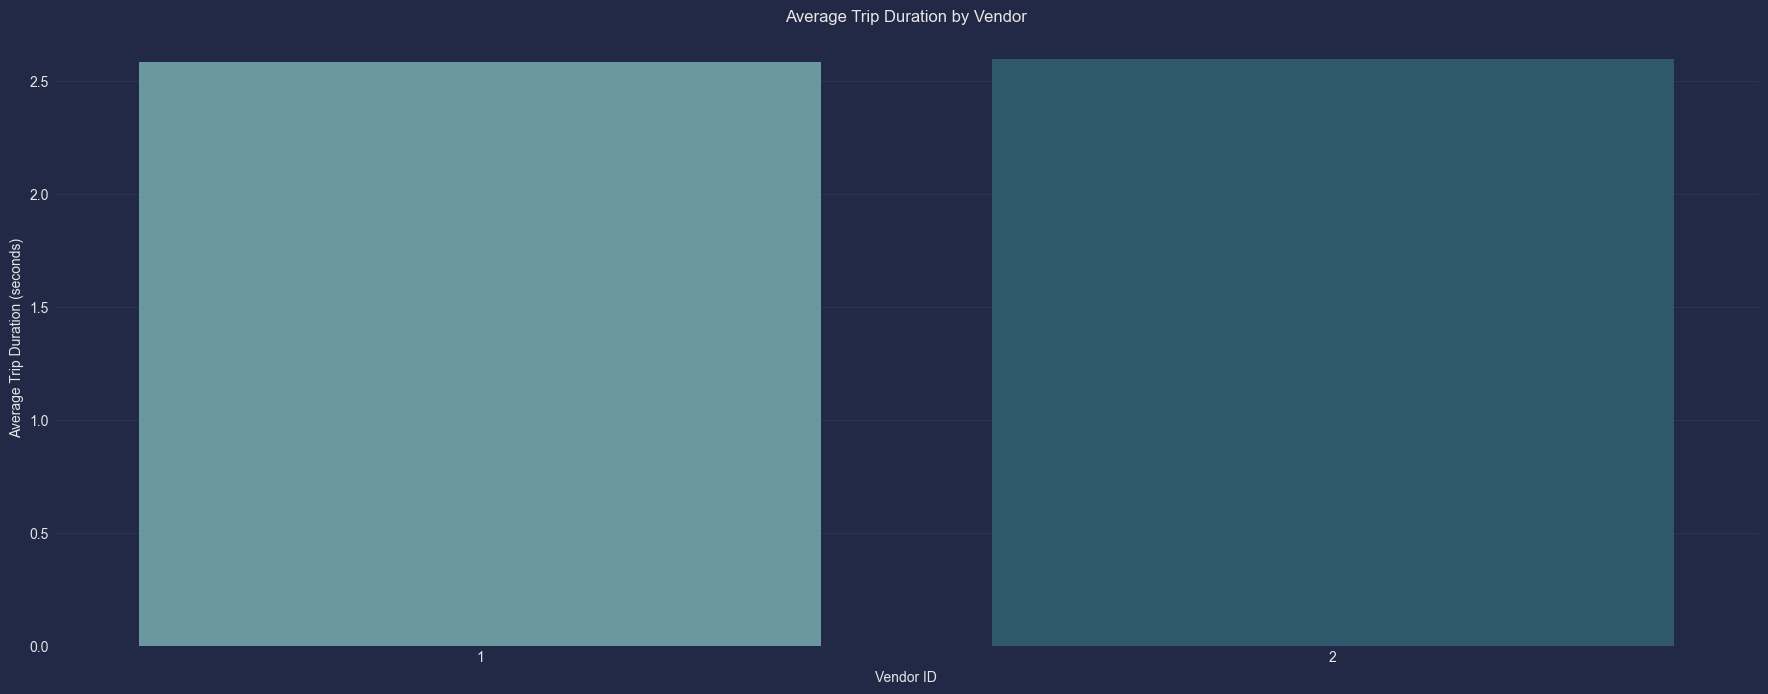

In [78]:
avg_duration_by_vendor = taxi_data.groupby('vendor_id')['trip_distance'].mean()
sns.barplot(x=avg_duration_by_vendor.index, y=avg_duration_by_vendor.values, palette=['#639FA6','#265C76'])
plt.title('Average Trip Duration by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()

### Is there a significant difference in trip durations between Vendor 1 and Vendor 2?


In [79]:
from scipy import stats

# Separate trip durations for Vendor 1 and Vendor 2
vendor_1_durations = taxi_data[taxi_data['vendor_id'] == 1]['trip_duration']
vendor_2_durations = taxi_data[taxi_data['vendor_id'] == 2]['trip_duration']

# *t-test
t_statistic, p_value = stats.ttest_ind(vendor_1_durations, vendor_2_durations)

# Set significance level
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference in trip durations between Vendor 1 and Vendor 2 (p < 0.05)")
else:
    print("There is no significant difference in trip durations between Vendor 1 and Vendor 2 (p >= 0.05)")


There is a significant difference in trip durations between Vendor 1 and Vendor 2 (p < 0.05)


In [80]:
vendor_1_mean_duration = vendor_1_durations.mean()
vendor_2_mean_duration = vendor_2_durations.mean()

# Print the means
print("Mean trip duration for Vendor 1:", vendor_1_mean_duration)
print("Mean trip duration for Vendor 2:", vendor_2_mean_duration)

# Compare means (higher value indicates longer trips)
if vendor_1_mean_duration > vendor_2_mean_duration:
  print("Vendor 1 has longer trips on average.")
else:
  print("Vendor 2 has longer trips on average.")

Mean trip duration for Vendor 1: 719.7912954370784
Mean trip duration for Vendor 2: 723.5649916188759
Vendor 2 has longer trips on average.


---


## Store and Forward Flag Analysis 🗂️🚖

### Overview

This section examines the impact of the "store and forward" flag on taxi trips, indicating whether trip records were held in the vehicle memory due to a lack of server connection.

### Insights

By analyzing the "store and forward" flag, we aim to understand its influence on trip duration and potential implications for taxi service efficiency and reliability.


### What percentage of trips were marked as "store and forward"?


In [81]:
store_and_forward_trips = taxi_data[taxi_data['store_and_fwd_flag'] == 'Y'].shape[0]
total_trips = taxi_data.shape[0]
percentage_store_and_forward = (store_and_forward_trips / total_trips) * 100

print(f"Percentage of 'store and forward' trips: {percentage_store_and_forward:.2f}%")


Percentage of 'store and forward' trips: 0.50%


### Is there any correlation between "store and forward" trips and trip duration?


In [82]:
# Assign binary values to store_and_fwd_flag for correlation calculation
taxi_data['store_and_fwd_flag_binary'] = taxi_data['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)

correlation = taxi_data['store_and_fwd_flag_binary'].corr(taxi_data['trip_duration'])

print(f"Correlation between 'store and forward' trips and trip duration: {correlation:.2f}")


Correlation between 'store and forward' trips and trip duration: 0.01


### Are there any noticeable patterns in the distribution of "store and forward" trips throughout the day or week?


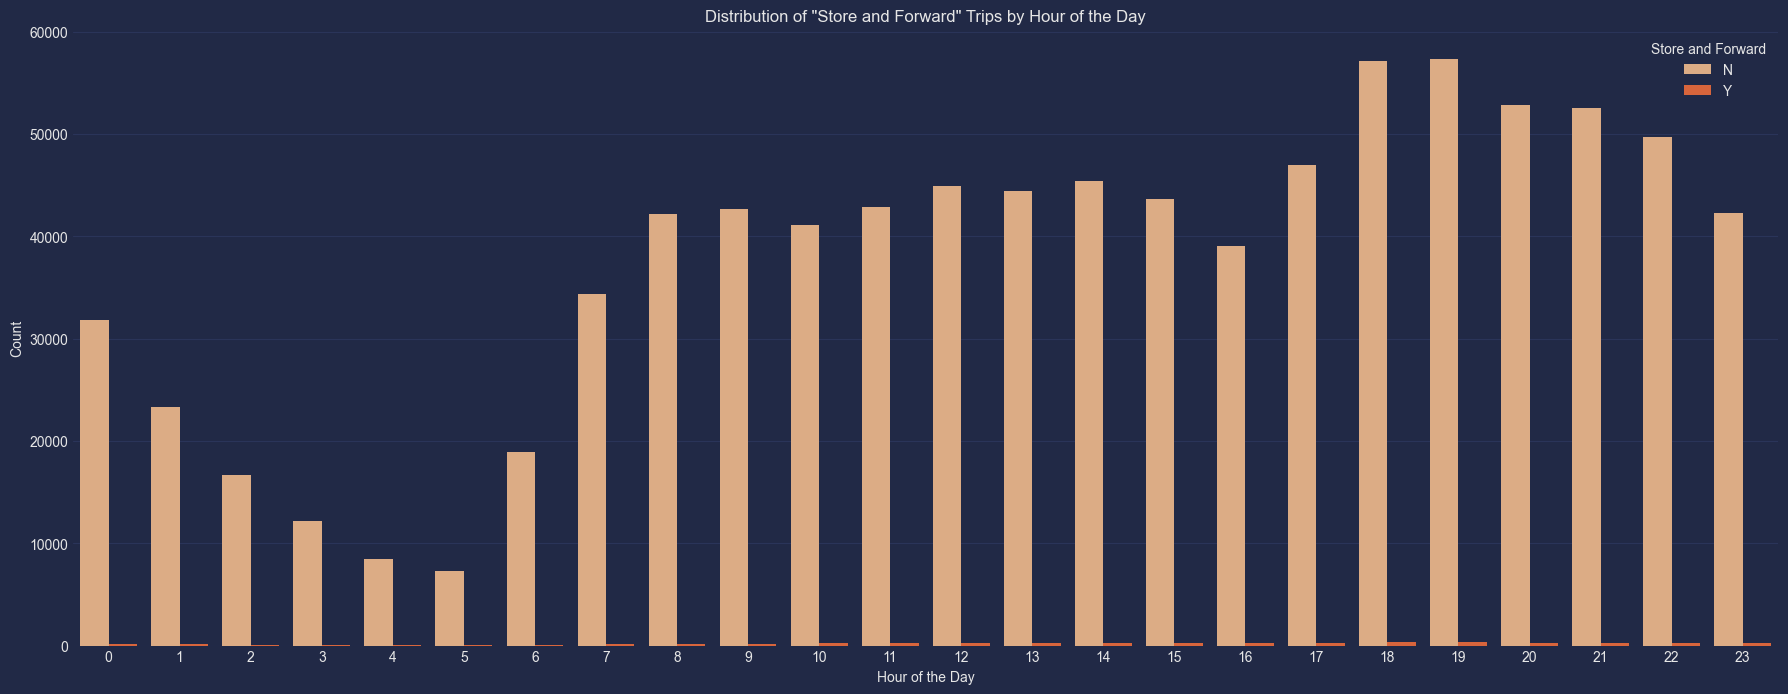

In [83]:
sns.countplot(x='pickup_hour', hue='store_and_fwd_flag', data=taxi_data,palette=['#EBAA76','#F25922'])
plt.title('Distribution of "Store and Forward" Trips by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Store and Forward')
plt.show()

### Average trip distance


In [84]:
average_distance = taxi_data.groupby('store_and_fwd_flag')['trip_distance'].mean()

average_distance


store_and_fwd_flag
N    2.586689
Y    2.958182
Name: trip_distance, dtype: float64

---


## Weather Data Fields

- **date**: The date corresponding to the weather measurements 📅
- **maximum temperature**: The highest temperature recorded on that date 🌡️
- **minimum temperature**: The lowest temperature recorded on that date 🌡️
- **average temperature**: The average temperature for that date 🌡️
- **precipitation**: The amount of precipitation (rainfall) on that date ☔
- **snow fall**: The amount of snowfall on that date ❄️
- **snow depth**: The depth of snow accumulation on that date 🌨️


In [ ]:
weather_data = pd.read_csv('Data\weather_data_nyc_centralpark_2016(1).csv')

In [ ]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
taxi_data['date'] = taxi_data['pickup_datetime'].dt.date

In [ ]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%m-%Y')

In [ ]:
weather_data

In [ ]:
taxi_data.describe().T

In [ ]:
taxi_data['date'] = pd.to_datetime(taxi_data['date'], errors='coerce')

# Convert 'date' column in weather_data to datetime
weather_data['date'] = pd.to_datetime(weather_data['date'], errors='coerce')

taxi_data['date'] = pd.to_datetime(taxi_data['date'], errors='coerce')

# Convert 'date' column in weather_data to datetime
weather_data['date'] = pd.to_datetime(weather_data['date'], errors='coerce')
taxi_data = taxi_data.dropna(subset=['date'])
weather_data = weather_data.dropna(subset=['date'])

# Now merge the dataframes on the 'date' column
merged_data = pd.merge(taxi_data, weather_data, on='date')

In [ ]:
merged_data.head()

---

# Build Model
